In [1]:
# pip install tsaug

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import missingno as msno
import warnings
import tsaug
from tsaug import TimeWarp, Crop, Quantize, Drift, Reverse, AddNoise
from tsaug.visualization import plot

In [3]:
pd.set_option('display.max_rows', 100)
warnings.filterwarnings('ignore')

In [4]:
os.getcwd()

'D:\\jupyter\\01_Sangwoo_Project\\03_Project\\03_GyengnamTP\\03_Collecting_data'

In [5]:
os.listdir()

['(2022.09.15)preprocessing(making_valid_shot_no).ipynb',
 '(2022.09.16)preprocessing(making_valid_shot_no).ipynb',
 '(2022.09.21)preprocessing(making_valid_shot_no_compete)(R1)_and_build_mo....ipynb',
 '.ipynb_checkpoints',
 '01_Electronic_current',
 '02_Vibration',
 '03_SQL순서(파라미터기준)',
 '04_daehyunkim',
 'Collecting_data.ipynb',
 'Daeshin_parameter_detail_220713_0903_VL04.csv',
 'Daeshin_parameter_detail_220714_0901_VL04.csv',
 'Daeshin_parameter_detail_220714_0903_VL04.csv',
 'Database_data_EDA.ipynb',
 'Database_data_EDA_2(0712~)_prior_MC_ID.ipynb',
 'iForest-tree.png',
 'KakaoTalk_20220824_120214874.png',
 'Tool5_small_data_create.csv',
 'Tool5_small_data_create.ipynb',
 'Tool5_small_data_processing.csv',
 'tree.dot',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'VL04_0710_0721_analysis.ipynb',
 'VL04_0710_0721_analysis_Tool5_kimdaehyun.ipynb',
 'VL04_0710_0721_analysis_Tool9.ipynb',
 'VL04_0713_0903_EDA.ipynb',
 'VL04_data.parquet',
 'VL04_shot_prediction.ipynb',
 'VL04_Tool5_Anomaly_

In [6]:
df=pd.read_csv('Daeshin_parameter_detail_220714_0903_VL04.csv')

In [7]:
df.head()

,datetime,tool_number,shot_no,current_x,current_z,current_spindle,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z
0,2022-07-14 00:00:00.080648,707.0,5835,1,70,2023,299,33.0,1.0,1.0,56.0,1.0,-56.0
1,2022-07-14 00:00:00.292011,707.0,5835,1,69,2023,299,33.0,1.0,2.0,56.0,2.0,-56.0
2,2022-07-14 00:00:00.480669,707.0,5835,0,69,2023,299,33.0,1.0,2.0,56.0,2.0,-56.0
3,2022-07-14 00:00:00.662358,707.0,5835,0,69,2023,299,33.0,1.0,2.0,57.0,2.0,-57.0
4,2022-07-14 00:00:00.861922,707.0,5835,0,69,2023,299,33.0,1.0,2.0,57.0,2.0,-57.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20621699 entries, 0 to 20621698
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   datetime         object 
 1   tool_number      float64
 2   shot_no          int64  
 3   current_x        int64  
 4   current_z        int64  
 5   current_spindle  int64  
 6   rpm              int64  
 7   feed             float64
 8   load_1           float64
 9   servo_load_x     float64
 10  servo_load_z     float64
 11  servo_current_x  float64
 12  servo_current_z  float64
dtypes: float64(7), int64(5), object(1)
memory usage: 2.0+ GB


In [9]:
df['tool_number'] = df['tool_number'].astype('str')
df['shot_no'] = df['shot_no'].astype('int64')

<AxesSubplot:>

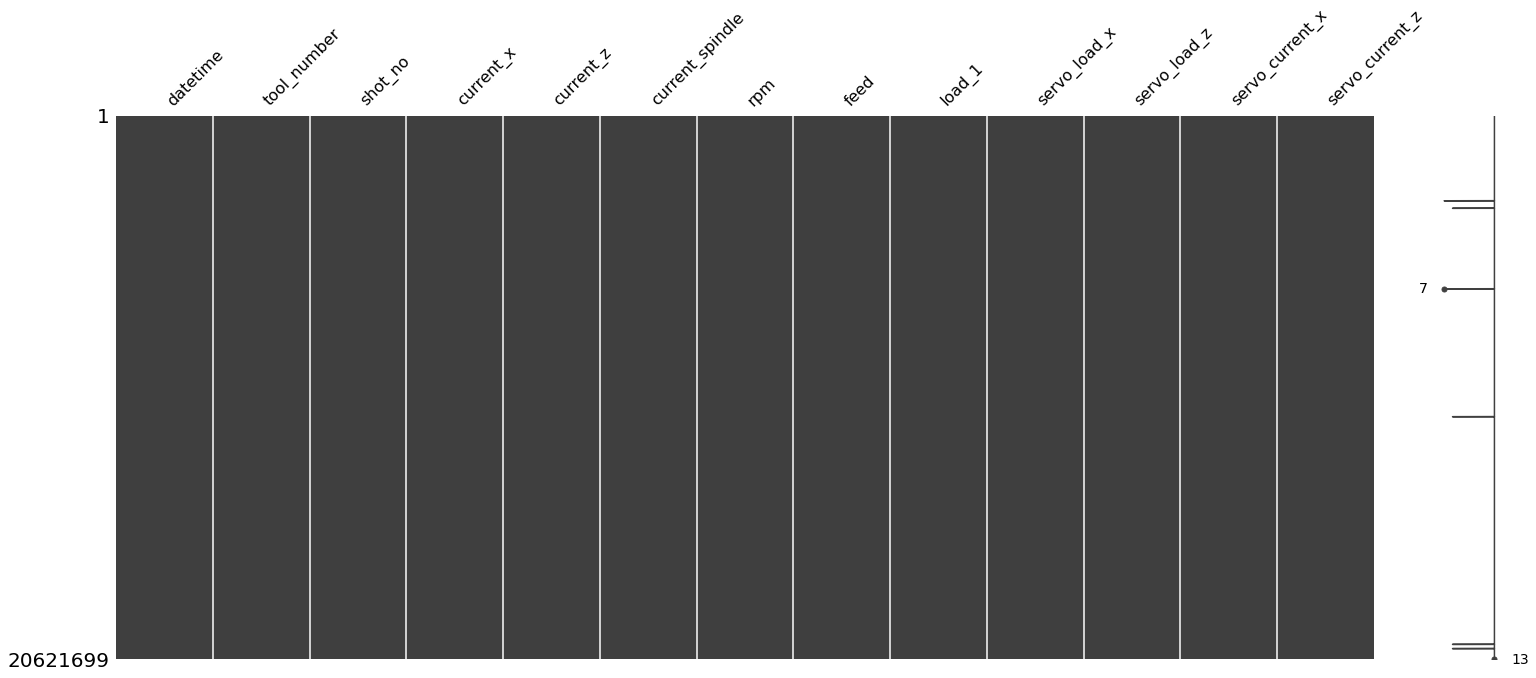

In [10]:
msno.matrix(df)

<AxesSubplot:>

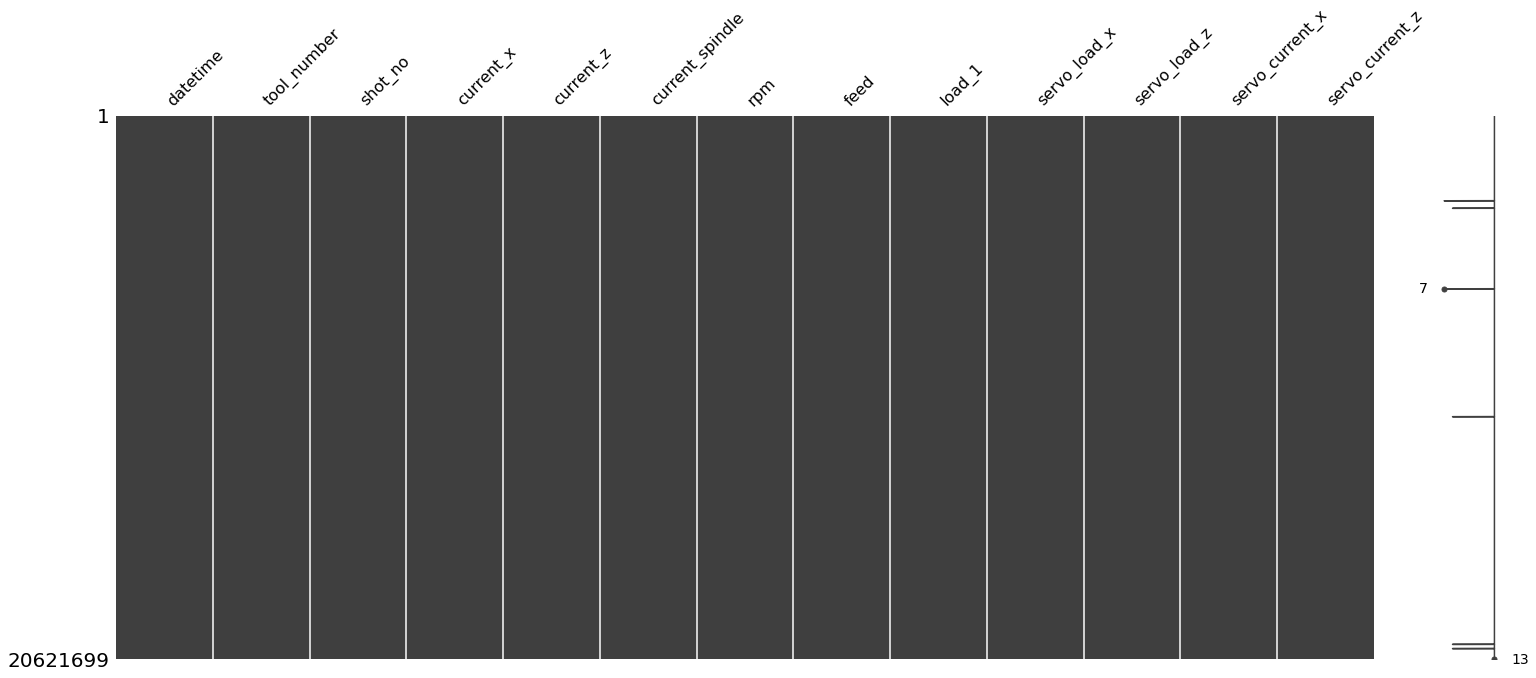

In [11]:
# df_mod1 = df.drop(['s_MC_Name', 's_ITEM_Name'], axis = 1)
df_mod1 = df
msno.matrix(df_mod1)

In [12]:
df_mod1['tool_number'].value_counts()

101.0     7887088
707.0     5578717
1111.0    2200190
505.0     2114194
909.0     1979571
0.0        399102
303.0      365942
700.0       21237
100.0       19179
1100.0      18565
300.0       14227
900.0       10819
500.0        9812
-1.0         1376
nan           602
599.0         223
799.0         201
399.0         193
1199.0        180
999.0         165
199.0         116
Name: tool_number, dtype: int64

In [13]:
len(df_mod1['tool_number'])

20621699

In [14]:
df_mod2 = df_mod1.dropna(axis = 0)
df_mod2['tool_number'].value_counts()

101.0     7886176
707.0     5578717
1111.0    2200190
505.0     2114194
909.0     1979571
0.0        399102
303.0      365942
700.0       21237
100.0       19179
1100.0      18565
300.0       14227
900.0       10819
500.0        9812
599.0         223
799.0         201
399.0         193
1199.0        180
999.0         165
199.0         116
Name: tool_number, dtype: int64

In [15]:
len(df_mod2)

20618809

In [16]:
len(df_mod1['tool_number']) - len(df_mod2)

2890

dropna를 수행해도 tool5의 데이터는 영향 없음

In [17]:
df_mod2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20618809 entries, 0 to 20621698
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   datetime         object 
 1   tool_number      object 
 2   shot_no          int64  
 3   current_x        int64  
 4   current_z        int64  
 5   current_spindle  int64  
 6   rpm              int64  
 7   feed             float64
 8   load_1           float64
 9   servo_load_x     float64
 10  servo_load_z     float64
 11  servo_current_x  float64
 12  servo_current_z  float64
dtypes: float64(6), int64(5), object(2)
memory usage: 2.2+ GB


In [18]:
df_mod2['tool_number'] = pd.to_numeric(df_mod2['tool_number'])
df_mod2['tool_number'] = df_mod2['tool_number'].astype('int64')

In [19]:
df_mod2['tool_number'] % 100

0           7
1           7
2           7
3           7
4           7
           ..
20621694    3
20621695    3
20621696    3
20621697    3
20621698    3
Name: tool_number, Length: 20618809, dtype: int64

# tool_number를 통한 tool 번호 도출

In [20]:
df_mod2['state'] = df_mod2['tool_number'] % 100
df_mod2['tip_number'] = (df_mod2['tool_number'] - df_mod2['state']) / 100
df_mod2[df_mod2['tip_number'] == 11]['tool_number'].value_counts()

1111    2200190
1100      18565
1199        180
Name: tool_number, dtype: int64

In [21]:
df_mod2

,datetime,tool_number,shot_no,current_x,current_z,current_spindle,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,state,tip_number
0,2022-07-14 00:00:00.080648,707,5835,1,70,2023,299,33.0,1.0,1.0,56.0,1.0,-56.0,7,7.0
1,2022-07-14 00:00:00.292011,707,5835,1,69,2023,299,33.0,1.0,2.0,56.0,2.0,-56.0,7,7.0
2,2022-07-14 00:00:00.480669,707,5835,0,69,2023,299,33.0,1.0,2.0,56.0,2.0,-56.0,7,7.0
3,2022-07-14 00:00:00.662358,707,5835,0,69,2023,299,33.0,1.0,2.0,57.0,2.0,-57.0,7,7.0
4,2022-07-14 00:00:00.861922,707,5835,0,69,2023,299,33.0,1.0,2.0,57.0,2.0,-57.0,7,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20621694,2022-09-03 23:59:59.094401,303,6801,0,128,16,0,50.0,0.0,3.0,55.0,-3.0,-55.0,3,3.0
20621695,2022-09-03 23:59:59.273896,303,6801,0,128,16,0,50.0,0.0,3.0,55.0,-3.0,-55.0,3,3.0
20621696,2022-09-03 23:59:59.482536,303,6801,1,126,17,0,50.0,0.0,3.0,55.0,-3.0,-55.0,3,3.0
20621697,2022-09-03 23:59:59.705053,303,6801,1,126,17,0,50.0,0.0,3.0,56.0,-3.0,-56.0,3,3.0


In [22]:
df_mod2['state'].unique()

array([ 7,  0,  1,  5, 99,  9, 11,  3], dtype=int64)

위 해당 코드로는 11 tool에 대한 99값이 도출되므로 날코딩으로 작성

In [23]:
df_mod2.drop(['state', 'tip_number'], axis = 1, inplace = True)

In [24]:
df_mod2['tip_number'] = df_mod2['tool_number']
df_mod2['state'] = df_mod2['tool_number']

In [25]:
df_mod2['tip_number'].unique()

array([ 707,  100,  101,  500,  505,  599,  900,  909, 1100, 1111,  700,
        300,  303,  399,  199,  999,  799, 1199,    0], dtype=int64)

In [26]:
df_mod2['state'].unique()

array([ 707,  100,  101,  500,  505,  599,  900,  909, 1100, 1111,  700,
        300,  303,  399,  199,  999,  799, 1199,    0], dtype=int64)

In [27]:
temp_state = df_mod2['state'].unique()
temp_tip = df_mod2['tip_number'].unique()
state_list = ['operation', 'cancel', 'operation', 'cancel', 'operation', 'end', 'cancel', 'operation', 'cancel', 'operation', 'cancel', 'cancel', 'operation', 'end', 'end', 'end', 'end', 'end', 0]
tip_list = [7,1,1,5,5,5,9,9,11,11,7,3,3,3,1,9,7,11,0]
df_mod2['state'] = df_mod2['state'].replace(temp_state, state_list)
df_mod2['tip_number'] = df_mod2['tip_number'].replace(temp_tip, tip_list)
# df_mod2['tip_number'] = df_mod2['tip_number'].astype('str')

In [28]:
df_mod2

,datetime,tool_number,shot_no,current_x,current_z,current_spindle,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tip_number,state
0,2022-07-14 00:00:00.080648,707,5835,1,70,2023,299,33.0,1.0,1.0,56.0,1.0,-56.0,7,operation
1,2022-07-14 00:00:00.292011,707,5835,1,69,2023,299,33.0,1.0,2.0,56.0,2.0,-56.0,7,operation
2,2022-07-14 00:00:00.480669,707,5835,0,69,2023,299,33.0,1.0,2.0,56.0,2.0,-56.0,7,operation
3,2022-07-14 00:00:00.662358,707,5835,0,69,2023,299,33.0,1.0,2.0,57.0,2.0,-57.0,7,operation
4,2022-07-14 00:00:00.861922,707,5835,0,69,2023,299,33.0,1.0,2.0,57.0,2.0,-57.0,7,operation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20621694,2022-09-03 23:59:59.094401,303,6801,0,128,16,0,50.0,0.0,3.0,55.0,-3.0,-55.0,3,operation
20621695,2022-09-03 23:59:59.273896,303,6801,0,128,16,0,50.0,0.0,3.0,55.0,-3.0,-55.0,3,operation
20621696,2022-09-03 23:59:59.482536,303,6801,1,126,17,0,50.0,0.0,3.0,55.0,-3.0,-55.0,3,operation
20621697,2022-09-03 23:59:59.705053,303,6801,1,126,17,0,50.0,0.0,3.0,56.0,-3.0,-56.0,3,operation


In [29]:
df_mod2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20618809 entries, 0 to 20621698
Data columns (total 15 columns):
 #   Column           Dtype  
---  ------           -----  
 0   datetime         object 
 1   tool_number      int64  
 2   shot_no          int64  
 3   current_x        int64  
 4   current_z        int64  
 5   current_spindle  int64  
 6   rpm              int64  
 7   feed             float64
 8   load_1           float64
 9   servo_load_x     float64
 10  servo_load_z     float64
 11  servo_current_x  float64
 12  servo_current_z  float64
 13  tip_number       int64  
 14  state            object 
dtypes: float64(6), int64(7), object(2)
memory usage: 2.5+ GB


# 초 단위로 데이터 재조정

In [30]:
df_mod3 = df_mod2
df_mod3['datetime'] = pd.to_datetime(df_mod3['datetime'])
df_mod3['date'] = df_mod3['datetime'].dt.date
df_mod3['hour'] = df_mod3['datetime'].dt.hour
df_mod3['minute'] = df_mod3['datetime'].dt.minute
df_mod3['second'] = df_mod3['datetime'].dt.second
df_mod3['date'] = df_mod3['date'].astype('str')
df_mod3['hour'] = df_mod3['hour'].astype('str')
df_mod3['minute'] = df_mod3['minute'].astype('str')
df_mod3['second'] = df_mod3['second'].astype('str')
df_mod3['datetime'] = df_mod3['date'] + ' ' + df_mod3['hour']+ ':' + df_mod3['minute'] + ':' + df_mod3['second']
df_mod3['datetime'] = pd.to_datetime(df_mod3['datetime'])
df_mod3

,datetime,tool_number,shot_no,current_x,current_z,current_spindle,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tip_number,state,date,hour,minute,second
0,2022-07-14 00:00:00,707,5835,1,70,2023,299,33.0,1.0,1.0,56.0,1.0,-56.0,7,operation,2022-07-14,0,0,0
1,2022-07-14 00:00:00,707,5835,1,69,2023,299,33.0,1.0,2.0,56.0,2.0,-56.0,7,operation,2022-07-14,0,0,0
2,2022-07-14 00:00:00,707,5835,0,69,2023,299,33.0,1.0,2.0,56.0,2.0,-56.0,7,operation,2022-07-14,0,0,0
3,2022-07-14 00:00:00,707,5835,0,69,2023,299,33.0,1.0,2.0,57.0,2.0,-57.0,7,operation,2022-07-14,0,0,0
4,2022-07-14 00:00:00,707,5835,0,69,2023,299,33.0,1.0,2.0,57.0,2.0,-57.0,7,operation,2022-07-14,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20621694,2022-09-03 23:59:59,303,6801,0,128,16,0,50.0,0.0,3.0,55.0,-3.0,-55.0,3,operation,2022-09-03,23,59,59
20621695,2022-09-03 23:59:59,303,6801,0,128,16,0,50.0,0.0,3.0,55.0,-3.0,-55.0,3,operation,2022-09-03,23,59,59
20621696,2022-09-03 23:59:59,303,6801,1,126,17,0,50.0,0.0,3.0,55.0,-3.0,-55.0,3,operation,2022-09-03,23,59,59
20621697,2022-09-03 23:59:59,303,6801,1,126,17,0,50.0,0.0,3.0,56.0,-3.0,-56.0,3,operation,2022-09-03,23,59,59


# Tip 별로 분리

In [31]:
Tool5 = df_mod3[df_mod3['tip_number'] == 5]
Tool9 = df_mod3[df_mod3['tip_number'] == 9]
Tool5.head()

,datetime,tool_number,shot_no,current_x,current_z,current_spindle,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tip_number,state,date,hour,minute,second
4814,2022-07-14 00:16:07,500,5836,0,526,2016,299,0.0,1.0,5.0,74.0,5.0,-74.0,5,cancel,2022-07-14,0,16,7
4815,2022-07-14 00:16:08,500,5836,0,11,2015,299,0.0,1.0,5.0,74.0,5.0,-74.0,5,cancel,2022-07-14,0,16,8
4816,2022-07-14 00:16:08,500,5836,0,11,2015,299,0.0,0.0,5.0,74.0,5.0,-74.0,5,cancel,2022-07-14,0,16,8
4817,2022-07-14 00:16:08,500,5836,0,4,2014,299,0.0,1.0,5.0,73.0,5.0,-73.0,5,cancel,2022-07-14,0,16,8
4818,2022-07-14 00:16:08,500,5836,0,4,2014,299,0.0,1.0,5.0,73.0,5.0,-73.0,5,cancel,2022-07-14,0,16,8


1. 2022-08-03 경 데이터가 Tip이 고장날때까지 사용한 이력이 있어, 2022-08-03 기준으로 바로 전 팁교환 데이터를 포함하여 분석 수행
2. 단, 2022-08-02 09:59:04 ~ 2022-08-03 08:14:35 (약 1일간) 설비 전원이 OFF되어 있는 데이터가 존재함(비가동상태)
3. 2022-08-03 바로직전 공구교체한 시긴은 2022-07-20로 도출됨
4. 따라서, 2022-07-20 05:55:44 이후의 데이터부터 Tool5 탐색 수행

In [32]:
Tool5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2124229 entries, 4814 to 20617769
Data columns (total 19 columns):
 #   Column           Dtype         
---  ------           -----         
 0   datetime         datetime64[ns]
 1   tool_number      int64         
 2   shot_no          int64         
 3   current_x        int64         
 4   current_z        int64         
 5   current_spindle  int64         
 6   rpm              int64         
 7   feed             float64       
 8   load_1           float64       
 9   servo_load_x     float64       
 10  servo_load_z     float64       
 11  servo_current_x  float64       
 12  servo_current_z  float64       
 13  tip_number       int64         
 14  state            object        
 15  date             object        
 16  hour             object        
 17  minute           object        
 18  second           object        
dtypes: datetime64[ns](1), float64(6), int64(7), object(5)
memory usage: 324.1+ MB


In [33]:
Tool5[Tool5['datetime'] < '2022-07-20 05:55:44']

,datetime,tool_number,shot_no,current_x,current_z,current_spindle,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tip_number,state,date,hour,minute,second
4814,2022-07-14 00:16:07,500,5836,0,526,2016,299,0.0,1.0,5.0,74.0,5.0,-74.0,5,cancel,2022-07-14,0,16,7
4815,2022-07-14 00:16:08,500,5836,0,11,2015,299,0.0,1.0,5.0,74.0,5.0,-74.0,5,cancel,2022-07-14,0,16,8
4816,2022-07-14 00:16:08,500,5836,0,11,2015,299,0.0,0.0,5.0,74.0,5.0,-74.0,5,cancel,2022-07-14,0,16,8
4817,2022-07-14 00:16:08,500,5836,0,4,2014,299,0.0,1.0,5.0,73.0,5.0,-73.0,5,cancel,2022-07-14,0,16,8
4818,2022-07-14 00:16:08,500,5836,0,4,2014,299,0.0,1.0,5.0,73.0,5.0,-73.0,5,cancel,2022-07-14,0,16,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2689242,2022-07-20 05:52:35,505,5968,11,12,7812,200,0.0,122.0,5.0,71.0,5.0,-71.0,5,operation,2022-07-20,5,52,35
2689243,2022-07-20 05:52:35,505,5968,11,12,7812,110,0.0,122.0,5.0,72.0,5.0,-72.0,5,operation,2022-07-20,5,52,35
2689244,2022-07-20 05:52:35,505,5968,4,9,4921,110,0.0,122.0,5.0,72.0,5.0,-72.0,5,operation,2022-07-20,5,52,35
2689245,2022-07-20 05:52:36,505,5968,4,9,4921,7,0.0,0.0,5.0,72.0,5.0,-72.0,5,operation,2022-07-20,5,52,36


In [34]:
Tool5[Tool5['datetime'] >= '2022-07-18 10:56:28']

,datetime,tool_number,shot_no,current_x,current_z,current_spindle,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tip_number,state,date,hour,minute,second
1918853,2022-07-18 10:56:28,505,5926,32,4,2490,299,66.0,7.0,12.0,60.0,12.0,-60.0,5,operation,2022-07-18,10,56,28
1918854,2022-07-18 10:56:28,505,5926,32,4,2504,299,66.0,7.0,12.0,60.0,12.0,-60.0,5,operation,2022-07-18,10,56,28
1918855,2022-07-18 10:56:28,505,5926,32,4,2504,300,66.0,6.0,12.0,60.0,12.0,-60.0,5,operation,2022-07-18,10,56,28
1918856,2022-07-18 10:56:28,505,5926,32,4,2516,299,66.0,7.0,11.0,60.0,11.0,-60.0,5,operation,2022-07-18,10,56,28
1918857,2022-07-18 10:56:28,505,5926,32,4,2516,299,66.0,7.0,11.0,60.0,11.0,-60.0,5,operation,2022-07-18,10,56,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20617765,2022-09-03 23:46:52,505,6801,147,89,2148,300,0.0,82.0,5.0,71.0,5.0,-71.0,5,operation,2022-09-03,23,46,52
20617766,2022-09-03 23:46:52,505,6801,9,12,7710,251,0.0,119.0,4.0,70.0,4.0,-70.0,5,operation,2022-09-03,23,46,52
20617767,2022-09-03 23:46:52,505,6801,9,12,7710,179,0.0,122.0,4.0,69.0,4.0,-69.0,5,operation,2022-09-03,23,46,52
20617768,2022-09-03 23:46:52,505,6801,9,12,7710,84,0.0,117.0,4.0,70.0,4.0,-70.0,5,operation,2022-09-03,23,46,52


In [35]:
Tool5[Tool5['shot_no'] == 5926]

,datetime,tool_number,shot_no,current_x,current_z,current_spindle,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tip_number,state,date,hour,minute,second
1917635,2022-07-18 10:52:24,500,5926,0,167,2020,299,0.0,1.0,5.0,75.0,5.0,-75.0,5,cancel,2022-07-18,10,52,24
1917636,2022-07-18 10:52:24,500,5926,0,167,2020,299,0.0,1.0,5.0,75.0,5.0,-75.0,5,cancel,2022-07-18,10,52,24
1917637,2022-07-18 10:52:24,500,5926,0,167,2020,300,0.0,0.0,4.0,75.0,4.0,-75.0,5,cancel,2022-07-18,10,52,24
1917638,2022-07-18 10:52:24,500,5926,0,4,2018,300,0.0,1.0,4.0,74.0,4.0,-74.0,5,cancel,2022-07-18,10,52,24
1917639,2022-07-18 10:52:24,500,5926,0,4,2018,300,0.0,1.0,4.0,74.0,4.0,-74.0,5,cancel,2022-07-18,10,52,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919820,2022-07-18 10:59:41,505,5926,38,8,3828,224,0.0,121.0,5.0,72.0,5.0,-72.0,5,operation,2022-07-18,10,59,41
1919821,2022-07-18 10:59:41,505,5926,6,12,7225,224,0.0,121.0,5.0,72.0,5.0,-72.0,5,operation,2022-07-18,10,59,41
1919822,2022-07-18 10:59:42,505,5926,6,12,7225,131,0.0,122.0,5.0,72.0,5.0,-72.0,5,operation,2022-07-18,10,59,42
1919823,2022-07-18 10:59:42,505,5926,1,12,7225,131,0.0,122.0,5.0,72.0,5.0,-72.0,5,operation,2022-07-18,10,59,42


In [36]:
Tool5[Tool5['shot_no'] == 5927]

,datetime,tool_number,shot_no,current_x,current_z,current_spindle,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tip_number,state,date,hour,minute,second
1929574,2022-07-18 11:32:16,500,5927,0,220,2017,299,0.0,1.0,4.0,75.0,4.0,-75.0,5,cancel,2022-07-18,11,32,16
1929575,2022-07-18 11:32:16,500,5927,0,11,2017,300,0.0,0.0,5.0,75.0,5.0,-75.0,5,cancel,2022-07-18,11,32,16
1929576,2022-07-18 11:32:17,500,5927,0,11,2017,300,0.0,0.0,5.0,75.0,5.0,-75.0,5,cancel,2022-07-18,11,32,17
1929577,2022-07-18 11:32:17,500,5927,0,11,2017,299,0.0,1.0,5.0,74.0,5.0,-74.0,5,cancel,2022-07-18,11,32,17
1929578,2022-07-18 11:32:17,500,5927,0,11,2017,299,0.0,1.0,5.0,74.0,5.0,-74.0,5,cancel,2022-07-18,11,32,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1931587,2022-07-18 11:38:59,505,5927,9,6,2491,236,0.0,121.0,5.0,72.0,5.0,-72.0,5,operation,2022-07-18,11,38,59
1931588,2022-07-18 11:39:00,505,5927,9,12,7600,147,0.0,122.0,5.0,72.0,5.0,-72.0,5,operation,2022-07-18,11,39,0
1931589,2022-07-18 11:39:00,505,5927,9,12,7600,147,0.0,122.0,5.0,72.0,5.0,-72.0,5,operation,2022-07-18,11,39,0
1931590,2022-07-18 11:39:00,505,5927,2,7,4013,33,0.0,60.0,5.0,73.0,5.0,-73.0,5,operation,2022-07-18,11,39,0


In [37]:
Tool5[Tool5['shot_no'] == 5928]

,datetime,tool_number,shot_no,current_x,current_z,current_spindle,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tip_number,state,date,hour,minute,second
1962709,2022-07-18 13:23:04,500,5928,0,135,2015,299,0.0,0.0,4.0,75.0,4.0,-75.0,5,cancel,2022-07-18,13,23,4
1962710,2022-07-18 13:23:04,500,5928,0,6,2017,299,0.0,0.0,4.0,75.0,4.0,-75.0,5,cancel,2022-07-18,13,23,4
1962711,2022-07-18 13:23:04,500,5928,0,6,2017,299,0.0,0.0,4.0,75.0,4.0,-75.0,5,cancel,2022-07-18,13,23,4
1962712,2022-07-18 13:23:04,500,5928,0,6,2017,299,0.0,1.0,4.0,74.0,4.0,-74.0,5,cancel,2022-07-18,13,23,4
1962713,2022-07-18 13:23:04,500,5928,0,4,2016,300,12000.0,0.0,4.0,74.0,4.0,-74.0,5,cancel,2022-07-18,13,23,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965095,2022-07-18 13:31:02,505,5928,9,12,7737,226,0.0,121.0,5.0,73.0,5.0,-73.0,5,operation,2022-07-18,13,31,2
1965096,2022-07-18 13:31:02,505,5928,9,12,7737,226,0.0,121.0,5.0,73.0,5.0,-73.0,5,operation,2022-07-18,13,31,2
1965097,2022-07-18 13:31:03,505,5928,9,12,7737,134,0.0,122.0,4.0,73.0,4.0,-73.0,5,operation,2022-07-18,13,31,3
1965098,2022-07-18 13:31:03,505,5928,3,8,4134,32,0.0,58.0,4.0,73.0,4.0,-73.0,5,operation,2022-07-18,13,31,3


In [38]:
Tool5_mod1 = Tool5[Tool5['shot_no'] >= 5926]
Tool5_mod1

,datetime,tool_number,shot_no,current_x,current_z,current_spindle,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tip_number,state,date,hour,minute,second
1917635,2022-07-18 10:52:24,500,5926,0,167,2020,299,0.0,1.0,5.0,75.0,5.0,-75.0,5,cancel,2022-07-18,10,52,24
1917636,2022-07-18 10:52:24,500,5926,0,167,2020,299,0.0,1.0,5.0,75.0,5.0,-75.0,5,cancel,2022-07-18,10,52,24
1917637,2022-07-18 10:52:24,500,5926,0,167,2020,300,0.0,0.0,4.0,75.0,4.0,-75.0,5,cancel,2022-07-18,10,52,24
1917638,2022-07-18 10:52:24,500,5926,0,4,2018,300,0.0,1.0,4.0,74.0,4.0,-74.0,5,cancel,2022-07-18,10,52,24
1917639,2022-07-18 10:52:24,500,5926,0,4,2018,300,0.0,1.0,4.0,74.0,4.0,-74.0,5,cancel,2022-07-18,10,52,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20617765,2022-09-03 23:46:52,505,6801,147,89,2148,300,0.0,82.0,5.0,71.0,5.0,-71.0,5,operation,2022-09-03,23,46,52
20617766,2022-09-03 23:46:52,505,6801,9,12,7710,251,0.0,119.0,4.0,70.0,4.0,-70.0,5,operation,2022-09-03,23,46,52
20617767,2022-09-03 23:46:52,505,6801,9,12,7710,179,0.0,122.0,4.0,69.0,4.0,-69.0,5,operation,2022-09-03,23,46,52
20617768,2022-09-03 23:46:52,505,6801,9,12,7710,84,0.0,117.0,4.0,70.0,4.0,-70.0,5,operation,2022-09-03,23,46,52


# Tool5의 분 단위 도출

In [39]:
Tool5_minute = Tool5
Tool5_minute

,datetime,tool_number,shot_no,current_x,current_z,current_spindle,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tip_number,state,date,hour,minute,second
4814,2022-07-14 00:16:07,500,5836,0,526,2016,299,0.0,1.0,5.0,74.0,5.0,-74.0,5,cancel,2022-07-14,0,16,7
4815,2022-07-14 00:16:08,500,5836,0,11,2015,299,0.0,1.0,5.0,74.0,5.0,-74.0,5,cancel,2022-07-14,0,16,8
4816,2022-07-14 00:16:08,500,5836,0,11,2015,299,0.0,0.0,5.0,74.0,5.0,-74.0,5,cancel,2022-07-14,0,16,8
4817,2022-07-14 00:16:08,500,5836,0,4,2014,299,0.0,1.0,5.0,73.0,5.0,-73.0,5,cancel,2022-07-14,0,16,8
4818,2022-07-14 00:16:08,500,5836,0,4,2014,299,0.0,1.0,5.0,73.0,5.0,-73.0,5,cancel,2022-07-14,0,16,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20617765,2022-09-03 23:46:52,505,6801,147,89,2148,300,0.0,82.0,5.0,71.0,5.0,-71.0,5,operation,2022-09-03,23,46,52
20617766,2022-09-03 23:46:52,505,6801,9,12,7710,251,0.0,119.0,4.0,70.0,4.0,-70.0,5,operation,2022-09-03,23,46,52
20617767,2022-09-03 23:46:52,505,6801,9,12,7710,179,0.0,122.0,4.0,69.0,4.0,-69.0,5,operation,2022-09-03,23,46,52
20617768,2022-09-03 23:46:52,505,6801,9,12,7710,84,0.0,117.0,4.0,70.0,4.0,-70.0,5,operation,2022-09-03,23,46,52


In [40]:
Tool5_minute['datetime'] = Tool5_minute['date'] + ' ' + Tool5_minute['hour']+ ':' + Tool5_minute['minute']
Tool5_minute['datetime'] = pd.to_datetime(Tool5_minute['datetime'])
Tool5_minute = Tool5_minute.set_index('datetime')

In [41]:
Tool5_minute

,tool_number,shot_no,current_x,current_z,current_spindle,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tip_number,state,date,hour,minute,second
datetime,,,,,,,,,,,,,,,,,,
2022-07-14 00:16:00,500,5836,0,526,2016,299,0.0,1.0,5.0,74.0,5.0,-74.0,5,cancel,2022-07-14,0,16,7
2022-07-14 00:16:00,500,5836,0,11,2015,299,0.0,1.0,5.0,74.0,5.0,-74.0,5,cancel,2022-07-14,0,16,8
2022-07-14 00:16:00,500,5836,0,11,2015,299,0.0,0.0,5.0,74.0,5.0,-74.0,5,cancel,2022-07-14,0,16,8
2022-07-14 00:16:00,500,5836,0,4,2014,299,0.0,1.0,5.0,73.0,5.0,-73.0,5,cancel,2022-07-14,0,16,8
2022-07-14 00:16:00,500,5836,0,4,2014,299,0.0,1.0,5.0,73.0,5.0,-73.0,5,cancel,2022-07-14,0,16,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-03 23:46:00,505,6801,147,89,2148,300,0.0,82.0,5.0,71.0,5.0,-71.0,5,operation,2022-09-03,23,46,52
2022-09-03 23:46:00,505,6801,9,12,7710,251,0.0,119.0,4.0,70.0,4.0,-70.0,5,operation,2022-09-03,23,46,52
2022-09-03 23:46:00,505,6801,9,12,7710,179,0.0,122.0,4.0,69.0,4.0,-69.0,5,operation,2022-09-03,23,46,52


In [42]:
Tool5_mod1.set_index('datetime', inplace = True)

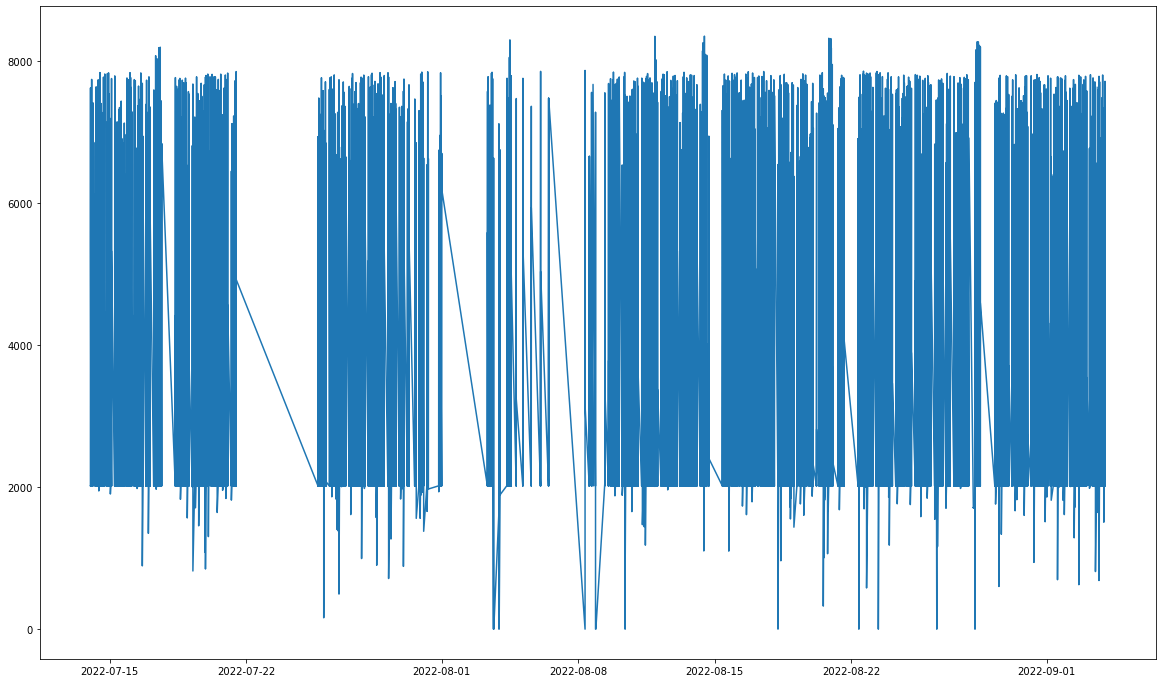

In [43]:
plt.figure(figsize = (20,12))
plt.plot(Tool5_minute['current_spindle'])

# 작업자 입력 교체시간 수정

In [44]:
# 작업자 입력 교체시간 리스트화(AS-IS)
change_list = pd.Series(['2022-07-18 10:56:28', '2022-07-20 05:55:44', '2022-08-03 09:30:12', '2022-08-12 10:46:12', '2022-08-16 13:29:18', '2022-08-17 08:18:57', '2022-08-18 08:27:36', '2022-08-19 09:02:46', '2022-08-20 09:24:40', '2022-08-21 14:24:03', '2022-08-23 18:34:07', '2022-08-28 18:48:35', '2022-08-29 17:50:00', '2022-08-30 09:52:18', '2022-08-31 19:07:39', '2022-09-01 10:49:24', '2022-09-02 13:30:39', '2022-09-03 09:49:45'], name = 'datetime')
change_shot = pd.Series([5926.5, 5968.5, 6218.5, 6311.5, 6393.5, 6412.5, 6436.5, 6460.5, 6481.5, 6513.5, 6538.5, 6667.5, 6675.5, 6691.5, 6723.5, 6739.5, 6766.5, 6785.5], name = 'shot_no')
state_list = []
for state_idx in range(0, len(change_list)):
    state_list.append('change')
state_list = pd.Series(state_list, name = 'state')
change_data = pd.concat([change_shot, state_list], axis = 1) # change_list
change_data = pd.concat([change_list, change_data], axis = 1)
change_data = change_data.set_index('datetime')
change_data

,shot_no,state
datetime,,
2022-07-18 10:56:28,5926.5,change
2022-07-20 05:55:44,5968.5,change
2022-08-03 09:30:12,6218.5,change
2022-08-12 10:46:12,6311.5,change
2022-08-16 13:29:18,6393.5,change
2022-08-17 08:18:57,6412.5,change
2022-08-18 08:27:36,6436.5,change
2022-08-19 09:02:46,6460.5,change
2022-08-20 09:24:40,6481.5,change


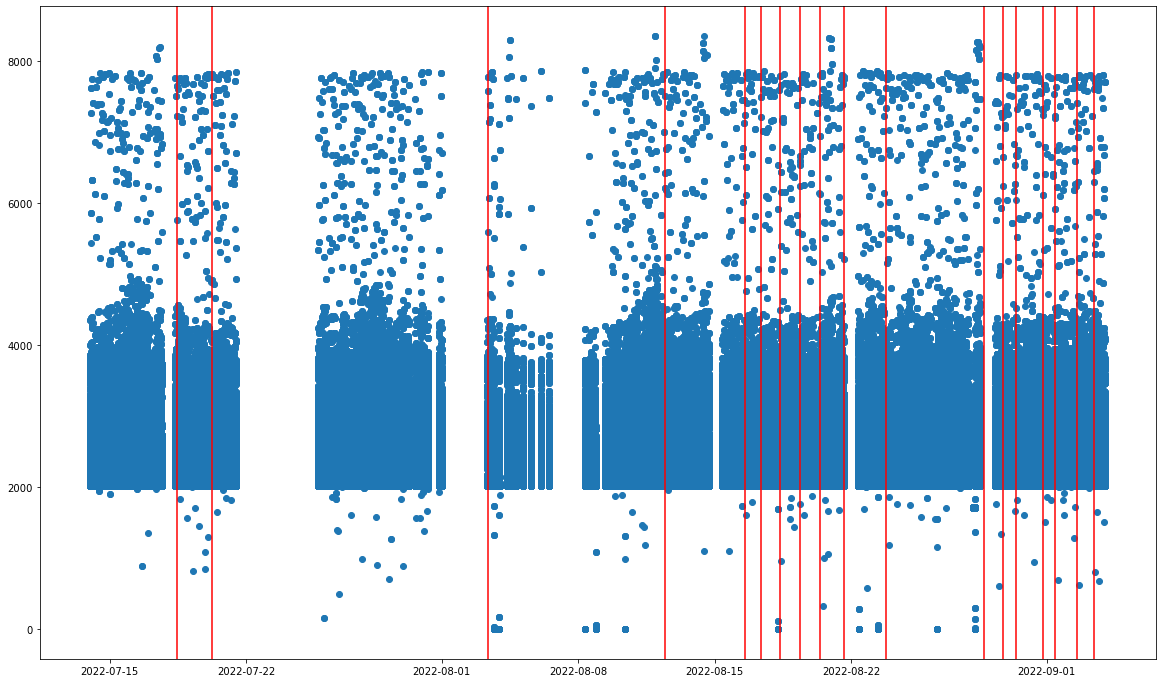

In [45]:
plt.figure(figsize = (20,12))
plt.scatter(Tool5_minute.index, Tool5_minute['current_spindle'])
for chl_idx in change_list:
    plt.axvline(chl_idx, color = 'red', label = '{}'.format(chl_idx), linestyle = 'solid')

In [46]:
Tool5_mod1[(Tool5_mod1['shot_no'] == 6722)]

,tool_number,shot_no,current_x,current_z,current_spindle,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tip_number,state,date,hour,minute,second
datetime,,,,,,,,,,,,,,,,,,
2022-08-31 18:17:06,500,6722,0,686,2017,299,0.0,1.0,3.0,74.0,3.0,-74.0,5,cancel,2022-08-31,18,17,6
2022-08-31 18:17:06,500,6722,0,13,2015,299,0.0,1.0,3.0,74.0,3.0,-74.0,5,cancel,2022-08-31,18,17,6
2022-08-31 18:17:06,500,6722,0,13,2015,299,0.0,0.0,3.0,73.0,3.0,-73.0,5,cancel,2022-08-31,18,17,6
2022-08-31 18:17:07,500,6722,0,4,2015,299,0.0,1.0,4.0,72.0,4.0,-72.0,5,cancel,2022-08-31,18,17,7
2022-08-31 18:17:07,500,6722,0,4,2015,299,0.0,1.0,4.0,72.0,4.0,-72.0,5,cancel,2022-08-31,18,17,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31 18:25:05,505,6722,39,7,3509,249,0.0,119.0,4.0,69.0,4.0,-69.0,5,operation,2022-08-31,18,25,5
2022-08-31 18:25:05,505,6722,7,12,7326,177,0.0,122.0,4.0,71.0,4.0,-71.0,5,operation,2022-08-31,18,25,5
2022-08-31 18:25:05,505,6722,7,12,7326,177,0.0,122.0,4.0,71.0,4.0,-71.0,5,operation,2022-08-31,18,25,5


In [47]:
Tool5_mod1[(Tool5_mod1['shot_no'] == 6723)]

,tool_number,shot_no,current_x,current_z,current_spindle,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tip_number,state,date,hour,minute,second
datetime,,,,,,,,,,,,,,,,,,
2022-08-31 19:10:52,500,6723,0,1227,2015,299,0.0,1.0,3.0,74.0,3.0,-74.0,5,cancel,2022-08-31,19,10,52
2022-08-31 19:10:52,500,6723,0,46,2016,299,0.0,1.0,3.0,74.0,3.0,-74.0,5,cancel,2022-08-31,19,10,52
2022-08-31 19:10:52,500,6723,0,46,2016,299,0.0,0.0,3.0,73.0,3.0,-73.0,5,cancel,2022-08-31,19,10,52
2022-08-31 19:10:53,500,6723,0,46,2016,299,0.0,1.0,4.0,73.0,4.0,-73.0,5,cancel,2022-08-31,19,10,53
2022-08-31 19:10:53,500,6723,0,4,2016,299,0.0,1.0,4.0,73.0,4.0,-73.0,5,cancel,2022-08-31,19,10,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31 19:18:10,505,6723,18,11,7311,271,0.0,115.0,5.0,71.0,5.0,-71.0,5,operation,2022-08-31,19,18,10
2022-08-31 19:18:10,505,6723,18,11,7311,208,0.0,122.0,4.0,70.0,4.0,-70.0,5,operation,2022-08-31,19,18,10
2022-08-31 19:18:10,505,6723,7,10,6117,121,0.0,122.0,4.0,70.0,4.0,-70.0,5,operation,2022-08-31,19,18,10


In [48]:
Tool5_mod1[(Tool5_mod1['shot_no'] == 6725)]

,tool_number,shot_no,current_x,current_z,current_spindle,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tip_number,state,date,hour,minute,second
datetime,,,,,,,,,,,,,,,,,,
2022-08-31 19:54:35,500,6725,0,557,2019,299,0.0,1.0,3.0,74.0,3.0,-74.0,5,cancel,2022-08-31,19,54,35
2022-08-31 19:54:35,500,6725,0,557,2019,299,0.0,0.0,4.0,73.0,4.0,-73.0,5,cancel,2022-08-31,19,54,35
2022-08-31 19:54:35,500,6725,0,10,2017,299,0.0,0.0,4.0,73.0,4.0,-73.0,5,cancel,2022-08-31,19,54,35
2022-08-31 19:54:36,500,6725,0,10,2017,299,0.0,0.0,3.0,72.0,3.0,-72.0,5,cancel,2022-08-31,19,54,36
2022-08-31 19:54:36,500,6725,0,4,2016,299,0.0,0.0,3.0,72.0,3.0,-72.0,5,cancel,2022-08-31,19,54,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31 20:02:30,505,6725,56,36,4398,249,0.0,119.0,4.0,71.0,4.0,-71.0,5,operation,2022-08-31,20,2,30
2022-08-31 20:02:30,505,6725,8,36,4398,249,0.0,119.0,4.0,71.0,4.0,-71.0,5,operation,2022-08-31,20,2,30
2022-08-31 20:02:30,505,6725,8,12,7237,177,0.0,122.0,4.0,70.0,4.0,-70.0,5,operation,2022-08-31,20,2,30


In [49]:
Tool5_mod1[(Tool5_mod1['shot_no'] == 6722) | (Tool5_mod1['shot_no'] == 6723)]

,tool_number,shot_no,current_x,current_z,current_spindle,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tip_number,state,date,hour,minute,second
datetime,,,,,,,,,,,,,,,,,,
2022-08-31 18:17:06,500,6722,0,686,2017,299,0.0,1.0,3.0,74.0,3.0,-74.0,5,cancel,2022-08-31,18,17,6
2022-08-31 18:17:06,500,6722,0,13,2015,299,0.0,1.0,3.0,74.0,3.0,-74.0,5,cancel,2022-08-31,18,17,6
2022-08-31 18:17:06,500,6722,0,13,2015,299,0.0,0.0,3.0,73.0,3.0,-73.0,5,cancel,2022-08-31,18,17,6
2022-08-31 18:17:07,500,6722,0,4,2015,299,0.0,1.0,4.0,72.0,4.0,-72.0,5,cancel,2022-08-31,18,17,7
2022-08-31 18:17:07,500,6722,0,4,2015,299,0.0,1.0,4.0,72.0,4.0,-72.0,5,cancel,2022-08-31,18,17,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31 19:18:10,505,6723,18,11,7311,271,0.0,115.0,5.0,71.0,5.0,-71.0,5,operation,2022-08-31,19,18,10
2022-08-31 19:18:10,505,6723,18,11,7311,208,0.0,122.0,4.0,70.0,4.0,-70.0,5,operation,2022-08-31,19,18,10
2022-08-31 19:18:10,505,6723,7,10,6117,121,0.0,122.0,4.0,70.0,4.0,-70.0,5,operation,2022-08-31,19,18,10


In [50]:
Tool5_mod1[(Tool5_mod1['shot_no'] == 6722)]

,tool_number,shot_no,current_x,current_z,current_spindle,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tip_number,state,date,hour,minute,second
datetime,,,,,,,,,,,,,,,,,,
2022-08-31 18:17:06,500,6722,0,686,2017,299,0.0,1.0,3.0,74.0,3.0,-74.0,5,cancel,2022-08-31,18,17,6
2022-08-31 18:17:06,500,6722,0,13,2015,299,0.0,1.0,3.0,74.0,3.0,-74.0,5,cancel,2022-08-31,18,17,6
2022-08-31 18:17:06,500,6722,0,13,2015,299,0.0,0.0,3.0,73.0,3.0,-73.0,5,cancel,2022-08-31,18,17,6
2022-08-31 18:17:07,500,6722,0,4,2015,299,0.0,1.0,4.0,72.0,4.0,-72.0,5,cancel,2022-08-31,18,17,7
2022-08-31 18:17:07,500,6722,0,4,2015,299,0.0,1.0,4.0,72.0,4.0,-72.0,5,cancel,2022-08-31,18,17,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31 18:25:05,505,6722,39,7,3509,249,0.0,119.0,4.0,69.0,4.0,-69.0,5,operation,2022-08-31,18,25,5
2022-08-31 18:25:05,505,6722,7,12,7326,177,0.0,122.0,4.0,71.0,4.0,-71.0,5,operation,2022-08-31,18,25,5
2022-08-31 18:25:05,505,6722,7,12,7326,177,0.0,122.0,4.0,71.0,4.0,-71.0,5,operation,2022-08-31,18,25,5


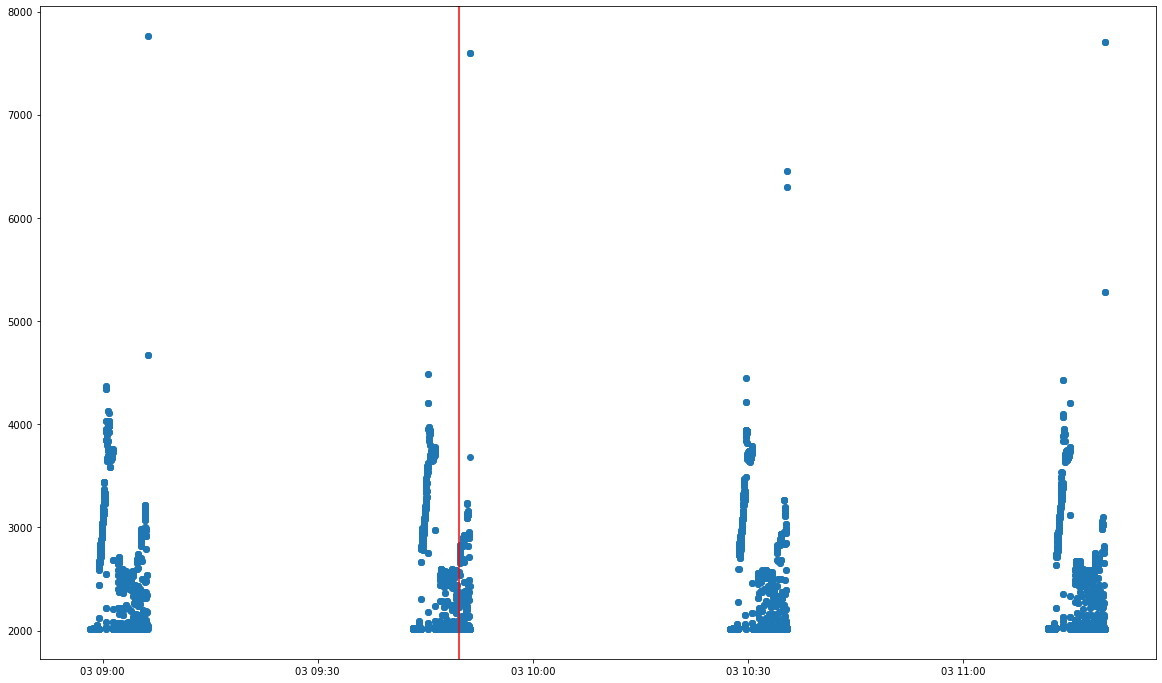

In [51]:
# 작업자 교체 입력 시간 (AS-IS)
plt.figure(figsize = (20,12))
plt.scatter(Tool5_mod1[(Tool5_mod1['shot_no'] == 6785) | (Tool5_mod1['shot_no'] == 6786)].index, Tool5_mod1[(Tool5_mod1['shot_no'] == 6785) | (Tool5_mod1['shot_no'] == 6786)]['current_spindle'])
plt.axvline('2022-09-03 09:49:45', color = 'red', label = '{}'.format(chl_idx), linestyle = 'solid')

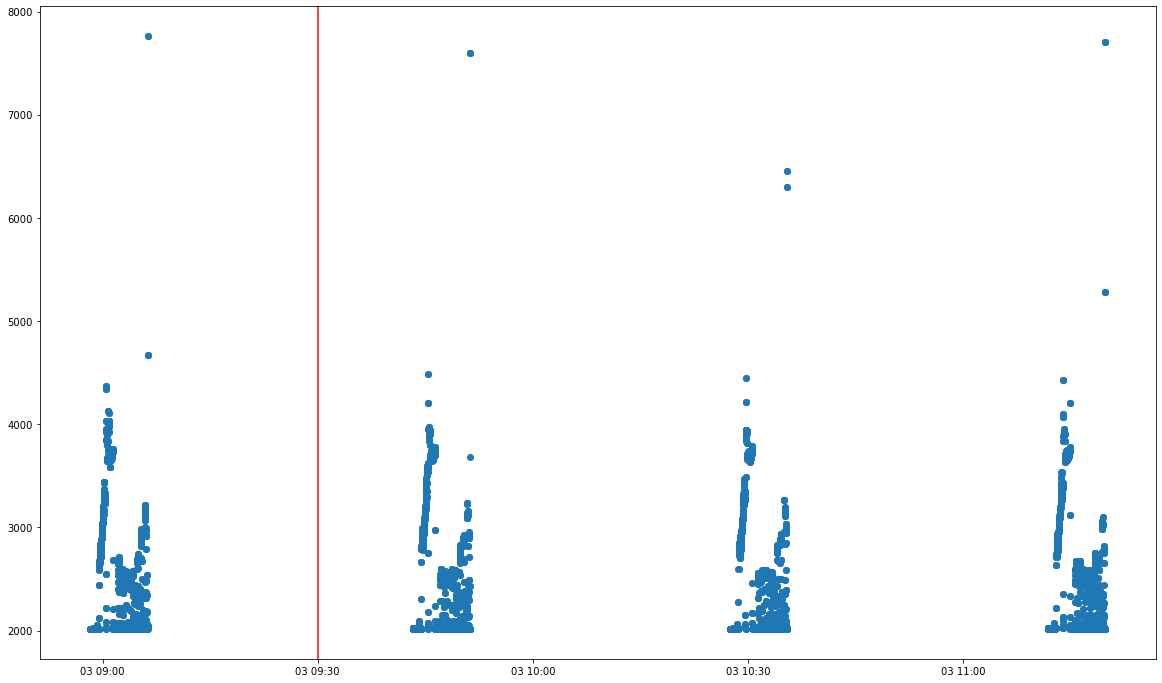

In [52]:
# 교체시간 수정(To-Be)
plt.figure(figsize = (20,12))
plt.scatter(Tool5_mod1[(Tool5_mod1['shot_no'] == 6785) | (Tool5_mod1['shot_no'] == 6786)].index, Tool5_mod1[(Tool5_mod1['shot_no'] == 6785) | (Tool5_mod1['shot_no'] == 6786)]['current_spindle'])
plt.axvline('2022-09-03 09:30:00', color = 'red', label = '{}'.format(chl_idx), linestyle = 'solid')

In [53]:
# 작업자 입력 교체시간 리스트화(To-Be)
change_list_mod1 = pd.Series(['2022-07-20 06:15:00', '2022-08-03 09:30:00','2022-08-12 10:38:00', '2022-08-16 13:40:00', '2022-08-17 08:10:00', '2022-08-18 08:47:00', '2022-08-19 08:47:00', '2022-08-20 09:30:00', '2022-08-21 14:35:00', '2022-08-23 18:34:07', '2022-08-28 18:48:35', '2022-08-29 17:35:00', '2022-08-30 09:35:00', '2022-08-31 18:50:00', '2022-09-01 11:05:00', '2022-09-02 13:35:00', '2022-09-03 09:30:00'], name = 'datetime')
change_shot_mod1 = pd.Series([5968.5, 6218.5, 6311.5, 6393.5, 6412.5, 6436.5, 6460.5, 6481.5, 6513.5, 6538.5, 6667.5, 6675.5, 6691.5, 6723.5, 6739.5, 6766.5, 6785.5], name = 'shot_no')
state_list_mod1 = []
for state_idx_mod1 in range(0, len(change_list_mod1)):
    state_list_mod1.append('change')
state_list_mod1 = pd.Series(state_list_mod1, name = 'state')
change_data_mod1 = pd.concat([change_shot_mod1, state_list_mod1], axis = 1) # change_list
change_data_mod1 = pd.concat([change_list_mod1, change_data_mod1], axis = 1)
change_data_mod1 = change_data_mod1.set_index('datetime')
change_data_mod1

,shot_no,state
datetime,,
2022-07-20 06:15:00,5968.5,change
2022-08-03 09:30:00,6218.5,change
2022-08-12 10:38:00,6311.5,change
2022-08-16 13:40:00,6393.5,change
2022-08-17 08:10:00,6412.5,change
2022-08-18 08:47:00,6436.5,change
2022-08-19 08:47:00,6460.5,change
2022-08-20 09:30:00,6481.5,change
2022-08-21 14:35:00,6513.5,change


In [54]:
Tool5_ori_mean = pd.Series(Tool5.groupby('shot_no').mean()['current_spindle'], name = 'mean')
Tool5_ori_sum = pd.Series(Tool5.groupby('shot_no').sum()['current_spindle'], name = 'sum')
Tool5_ori_std = pd.Series(Tool5.groupby('shot_no').std()['current_spindle'], name = 'std')
Tool5_ori_sem = pd.Series(Tool5.groupby('shot_no').sem()['current_spindle'], name = 'sem')
Tool5_ori_median = pd.Series(Tool5.groupby('shot_no').median()['current_spindle'], name = 'median')
Tool5_ori_var = pd.Series(Tool5.groupby('shot_no').var()['current_spindle'], name = 'var')
Tool5_ori_max = pd.Series(Tool5.groupby('shot_no').max()['current_spindle'], name = 'max')
temp = [Tool5_ori_mean, Tool5_ori_sum, Tool5_ori_std, Tool5_ori_sem, Tool5_ori_median, Tool5_ori_var, Tool5_ori_max]
Tool5_ori_stat = pd.Series()
for add in temp:
    Tool5_ori_stat = pd.concat([Tool5_ori_stat, add], axis = 1)
Tool5_ori_stat.drop(0, axis = 1, inplace = True)
Tool5_ori_stat

,mean,sum,std,sem,median,var,max
5836,2464.848720,5393089,580.650357,12.413408,2266.0,337154.837186,7621
5837,2478.898537,5423830,591.149602,12.637866,2274.0,349457.851612,7271
5838,2480.725400,5420385,586.000476,12.536383,2266.0,343396.558260,7741
5839,2470.330271,5377909,583.377759,12.503185,2266.0,340329.610080,6331
5840,2472.271148,5406857,584.767923,12.504293,2283.0,341953.523426,7412
...,...,...,...,...,...,...,...
6797,2455.123826,5749900,562.109324,11.615217,2246.0,315966.891965,7803
6798,2469.690009,5784014,577.048369,11.923912,2253.0,332984.820567,7342
6799,2456.291809,5757548,556.047875,11.485063,2257.0,309189.238755,6789
6800,2455.216909,5750118,550.683312,11.379115,2250.0,303252.110128,6672


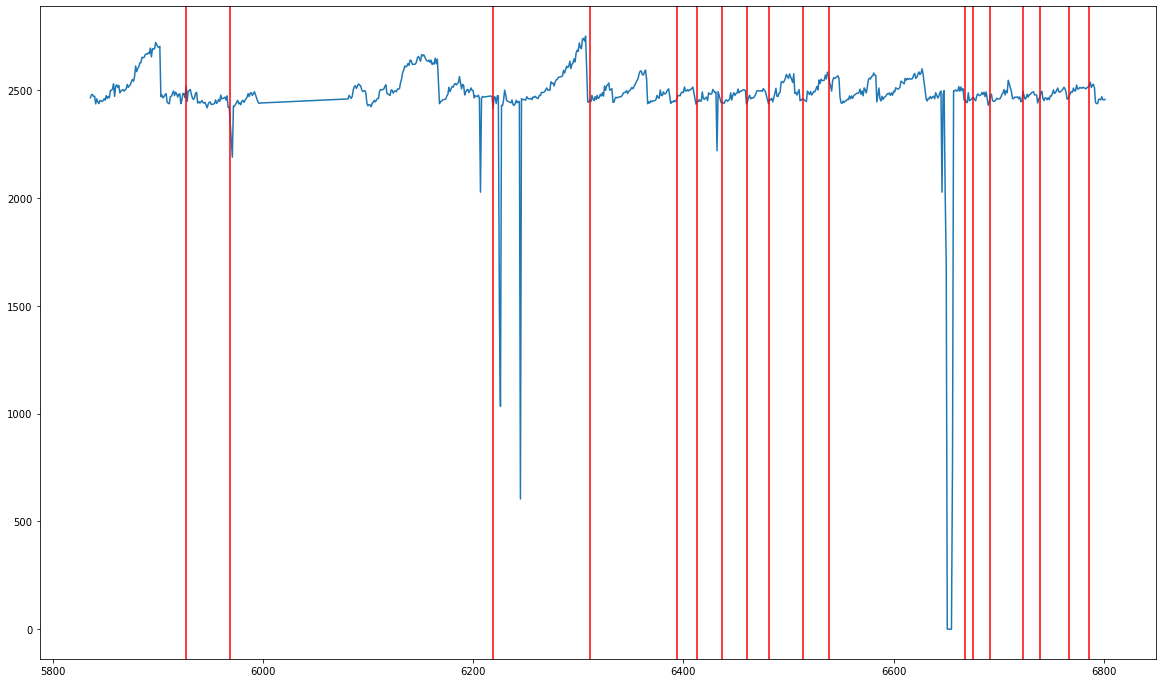

In [55]:
plt.figure(figsize=(20,12))
plt.plot(Tool5_ori_stat['mean'])
for chl_idx in change_shot:
    plt.axvline(chl_idx, color = 'red', label = '{}'.format(chl_idx), linestyle = 'solid')

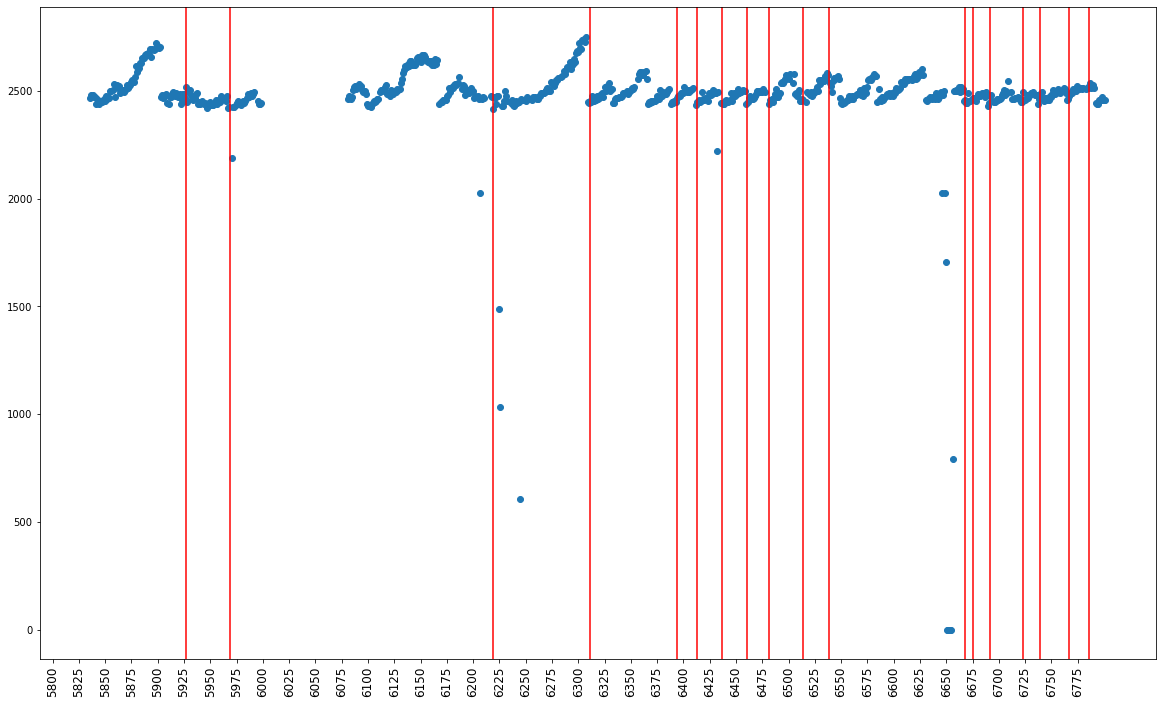

In [56]:
plt.figure(figsize=(20,12))
plt.scatter(Tool5_ori_stat.index, Tool5_ori_stat['mean'])
plt.xticks(np.arange(5800, 6800, step = 25), fontsize = 12, rotation = 90)
for chl_idx in change_shot:
    plt.axvline(chl_idx, color = 'red', label = '{}'.format(chl_idx), linestyle = 'solid')

5800 ~ 5900 사이의 데이터를 활용하여 이상치 데이터 활용 필요

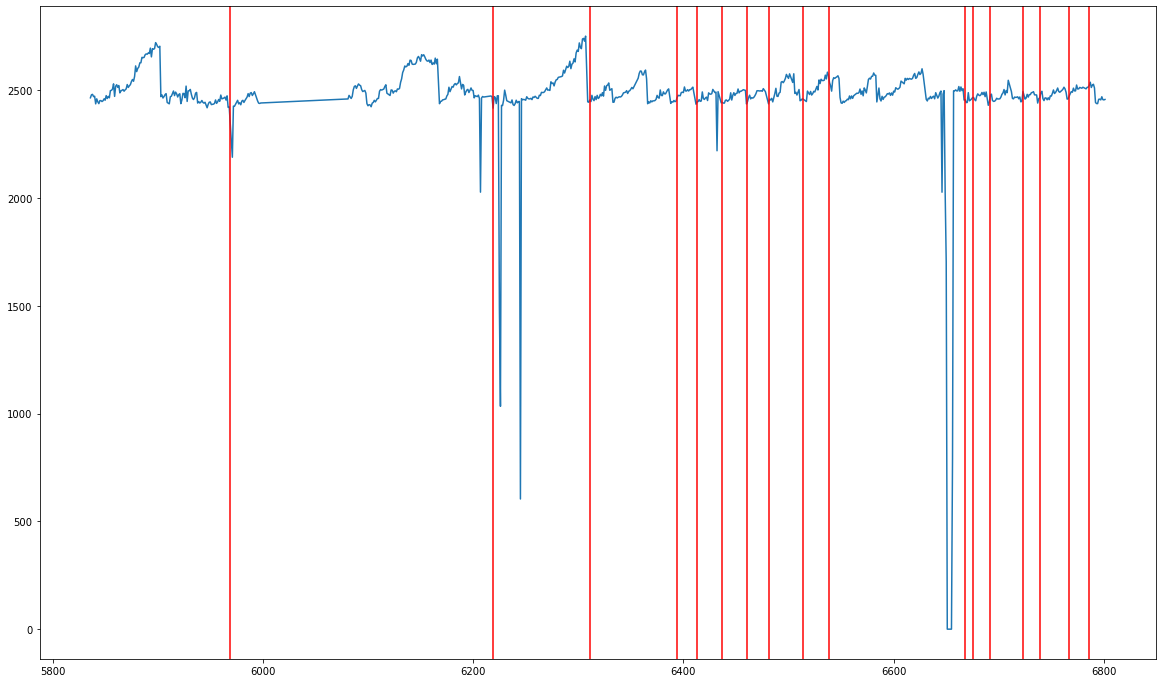

In [57]:
plt.figure(figsize=(20,12))
plt.plot(Tool5_ori_stat['mean'])
for chl_idx_mod1 in change_shot_mod1:
    plt.axvline(chl_idx_mod1, color = 'red', label = '{}'.format(chl_idx), linestyle = 'solid')

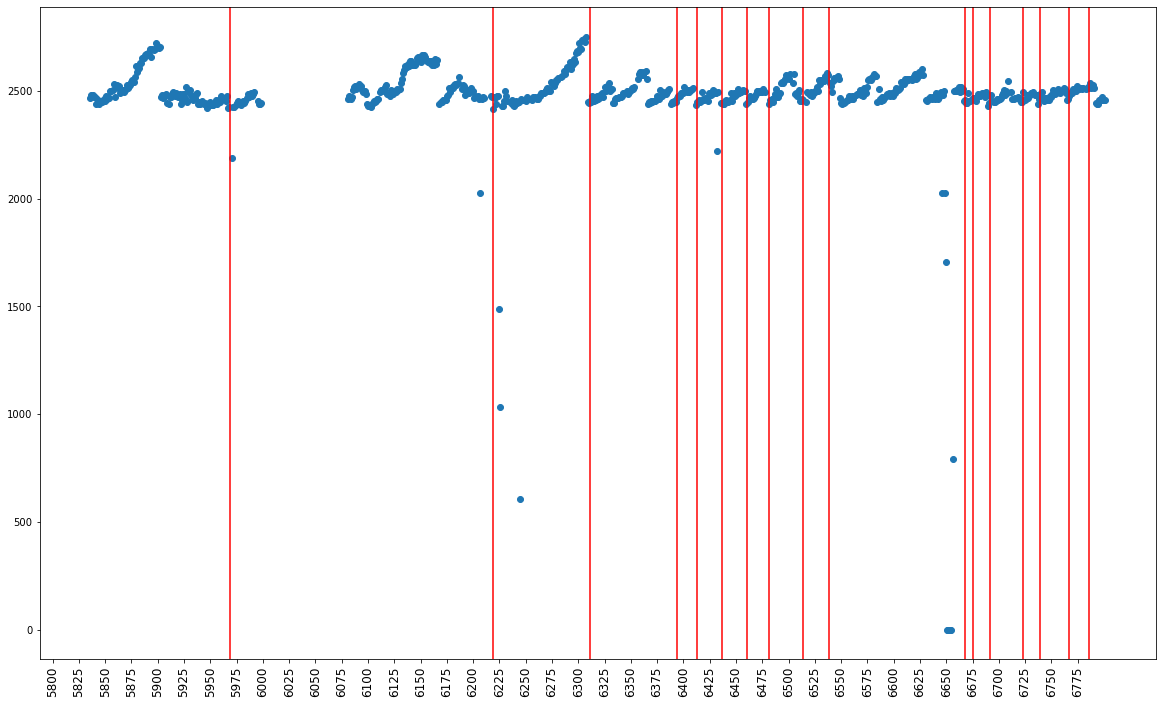

In [58]:
plt.figure(figsize=(20,12))
plt.scatter(Tool5_ori_stat.index, Tool5_ori_stat['mean'])
plt.xticks(np.arange(5800, 6800, step = 25), fontsize = 12, rotation = 90)
for chl_idx_mod1 in change_shot_mod1:
    plt.axvline(chl_idx_mod1, color = 'red', label = '{}'.format(chl_idx), linestyle = 'solid')

# 이상치 대체 
- 통상 current_spindle의 전류값은 2000이 기본
- 전류값 2000이 기본으로 시작하는 것으로 판단되어 2000 아래의 이상치에 대하여 2000으로 값 대체

In [59]:
Tool5_mod1

,tool_number,shot_no,current_x,current_z,current_spindle,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tip_number,state,date,hour,minute,second
datetime,,,,,,,,,,,,,,,,,,
2022-07-18 10:52:24,500,5926,0,167,2020,299,0.0,1.0,5.0,75.0,5.0,-75.0,5,cancel,2022-07-18,10,52,24
2022-07-18 10:52:24,500,5926,0,167,2020,299,0.0,1.0,5.0,75.0,5.0,-75.0,5,cancel,2022-07-18,10,52,24
2022-07-18 10:52:24,500,5926,0,167,2020,300,0.0,0.0,4.0,75.0,4.0,-75.0,5,cancel,2022-07-18,10,52,24
2022-07-18 10:52:24,500,5926,0,4,2018,300,0.0,1.0,4.0,74.0,4.0,-74.0,5,cancel,2022-07-18,10,52,24
2022-07-18 10:52:24,500,5926,0,4,2018,300,0.0,1.0,4.0,74.0,4.0,-74.0,5,cancel,2022-07-18,10,52,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-03 23:46:52,505,6801,147,89,2148,300,0.0,82.0,5.0,71.0,5.0,-71.0,5,operation,2022-09-03,23,46,52
2022-09-03 23:46:52,505,6801,9,12,7710,251,0.0,119.0,4.0,70.0,4.0,-70.0,5,operation,2022-09-03,23,46,52
2022-09-03 23:46:52,505,6801,9,12,7710,179,0.0,122.0,4.0,69.0,4.0,-69.0,5,operation,2022-09-03,23,46,52


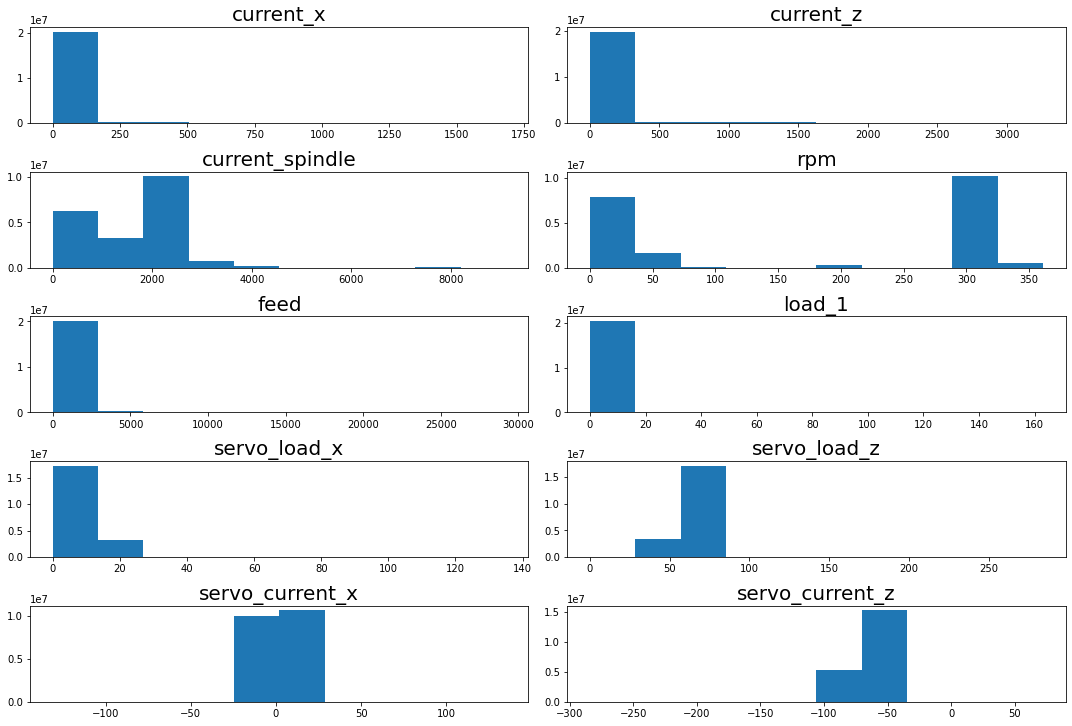

In [60]:
temp_df = Tool5_mod1.reset_index().drop(['datetime', 'shot_no','tool_number','tip_number', 'state', 'date', 'hour', 'minute', 'second'], axis = 1)
temp_col = temp_df.columns

fig = plt.figure(figsize = (15,20))

# histogram
for idx_hist in range(0, len(temp_col)):
    globals()['ax_{}'.format(idx_hist)] = fig.add_subplot(round(len(temp_col)+1/2),2,(idx_hist+1))
    globals()['ax_{}'.format(idx_hist)].hist(df_mod1[temp_col[idx_hist]])
    globals()['ax_{}'.format(idx_hist)].set_title('{}'.format(temp_col[idx_hist]), fontsize = 20)
fig.tight_layout()

In [61]:
df_mod1[temp_col[2]].value_counts()

0       5844331
2017     841395
2018     789477
2016     755162
2019     687318
         ...   
8633          1
6570          1
1789          1
8581          1
4963          1
Name: current_spindle, Length: 8462, dtype: int64

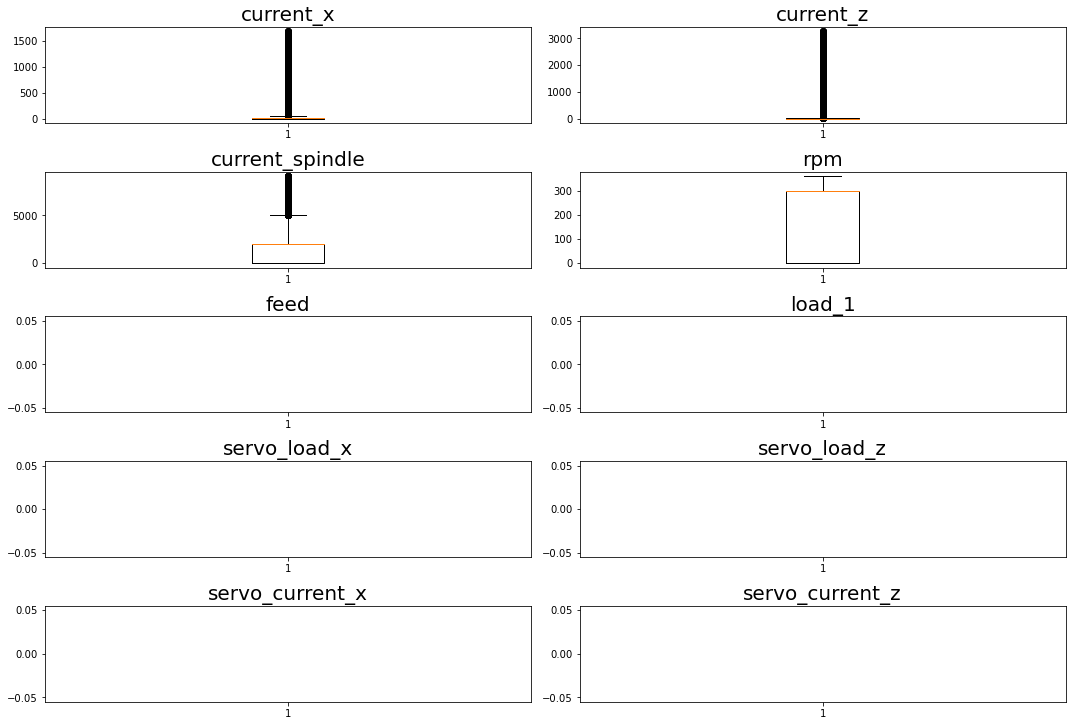

In [62]:
# boxplot

fig2 = plt.figure(figsize = (15,20))

for idx_box in range(0, len(temp_col)):
    globals()['ax_box{}'.format(idx_box)] = fig2.add_subplot(round(len(temp_col)+1/2),2,(idx_box+1))
    globals()['ax_box{}'.format(idx_box)].boxplot(df_mod1[temp_col[idx_box]])
    globals()['ax_box{}'.format(idx_box)].set_title('{}'.format(temp_col[idx_box]), fontsize = 20)
fig2.tight_layout()

In [63]:
Tool5_mod1['current_spindle'].describe()

count    1.919967e+06
mean     2.450324e+03
std      6.546446e+02
min      0.000000e+00
25%      2.018000e+03
50%      2.250000e+03
75%      2.734000e+03
max      8.350000e+03
Name: current_spindle, dtype: float64

In [64]:
Tool5_mod1.loc[Tool5_mod1[Tool5_mod1['current_spindle']> 2000].index, 'current_spindle'].mean()

2490.656013439583

In [65]:
Tool5_mod1['current_spindle'].mean()

2450.3240326526447

In [66]:
# import numpy as np
# Tool5_mod1.loc[Tool5_mod1[Tool5_mod1['current_spindle']< 2600].index, 'current_spindle'] = np.random.randint(2400, 2500)
np.random.randint(2600, 2700)

2666

In [67]:
Tool5_mod2 = Tool5_mod1[Tool5_mod1['current_spindle'] > 2300]

In [68]:
Tool5_mod2[Tool5_mod2['current_spindle']< 2600]

,tool_number,shot_no,current_x,current_z,current_spindle,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tip_number,state,date,hour,minute,second
datetime,,,,,,,,,,,,,,,,,,
2022-07-18 10:53:28,505,5926,1,187,2358,300,66.0,4.0,4.0,58.0,4.0,-58.0,5,operation,2022-07-18,10,53,28
2022-07-18 10:53:28,505,5926,1,187,2358,300,66.0,4.0,4.0,58.0,4.0,-58.0,5,operation,2022-07-18,10,53,28
2022-07-18 10:53:28,505,5926,1,187,2358,300,66.0,6.0,4.0,57.0,4.0,-57.0,5,operation,2022-07-18,10,53,28
2022-07-18 10:53:29,505,5926,1,182,2487,300,66.0,6.0,4.0,57.0,4.0,-57.0,5,operation,2022-07-18,10,53,29
2022-07-18 10:53:29,505,5926,1,182,2487,299,66.0,6.0,4.0,57.0,4.0,-57.0,5,operation,2022-07-18,10,53,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-03 23:46:47,505,6801,13,94,2516,299,60.0,5.0,11.0,53.0,-11.0,-53.0,5,operation,2022-09-03,23,46,47
2022-09-03 23:46:48,505,6801,13,94,2516,299,60.0,4.0,11.0,52.0,-11.0,-52.0,5,operation,2022-09-03,23,46,48
2022-09-03 23:46:48,505,6801,14,94,2330,299,60.0,4.0,11.0,52.0,-11.0,-52.0,5,operation,2022-09-03,23,46,48


In [69]:
Tool5_mod2.to_csv('Tool5_small_data_processing.csv')

In [70]:
Tool5_mean = pd.Series(Tool5_mod2.groupby('shot_no').mean()['current_spindle'], name = 'mean')
Tool5_sum = pd.Series(Tool5_mod2.groupby('shot_no').sum()['current_spindle'], name = 'sum')
Tool5_std = pd.Series(Tool5_mod2.groupby('shot_no').std()['current_spindle'], name = 'std')
Tool5_sem = pd.Series(Tool5_mod2.groupby('shot_no').sem()['current_spindle'], name = 'sem')
Tool5_median = pd.Series(Tool5_mod2.groupby('shot_no').median()['current_spindle'], name = 'median')
Tool5_var = pd.Series(Tool5_mod2.groupby('shot_no').var()['current_spindle'], name = 'var')
Tool5_max = pd.Series(Tool5_mod2.groupby('shot_no').max()['current_spindle'], name = 'max')
temp = [Tool5_mean, Tool5_sum, Tool5_std, Tool5_sem, Tool5_median, Tool5_var, Tool5_max]
Tool5_stat = pd.Series()
for add in temp:
    Tool5_stat = pd.concat([Tool5_stat, add], axis = 1)
Tool5_stat.drop(0, axis = 1, inplace = True)
Tool5_stat

,mean,sum,std,sem,median,var,max
5926,2925.809430,2978474,546.849143,17.139322,2693.0,299043.985280,7225
5927,2999.691843,2978694,583.365458,18.512543,2801.0,340315.257766,7600
5928,2920.630009,3133836,563.067278,17.189389,2715.0,317044.759434,7737
5929,2967.521780,3133703,560.045382,17.234205,2806.5,313650.829857,7755
5930,2955.651727,3165503,565.222425,17.271285,2745.0,319476.389808,6657
...,...,...,...,...,...,...,...
6797,2910.125000,3142935,540.805556,16.456189,2691.0,292470.648865,7803
6798,2943.144590,3155051,551.894698,16.856167,2762.0,304587.757786,7342
6799,2928.033397,3068579,527.085810,16.281735,2752.0,277819.451606,6789
6800,2892.975654,3208310,518.624180,15.573527,2692.0,268971.040020,6672


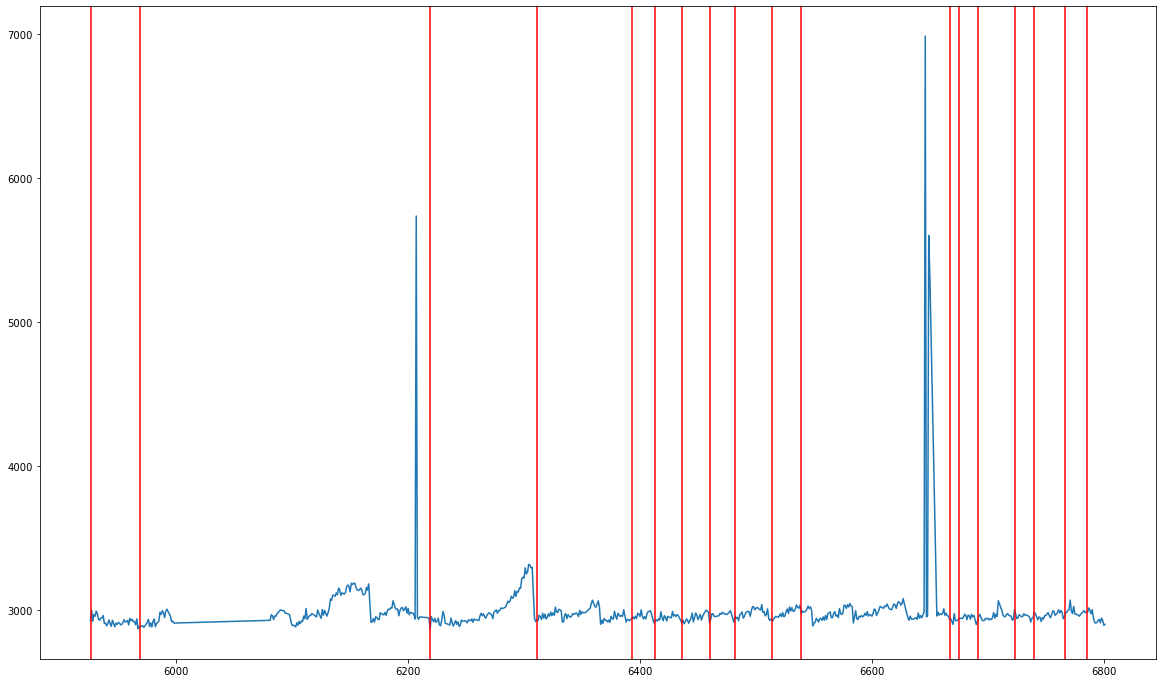

In [71]:
plt.figure(figsize=(20,12))
plt.plot(Tool5_stat['mean'])
for chl_idx in change_shot:
    plt.axvline(chl_idx, color = 'red', label = '{}'.format(chl_idx), linestyle = 'solid')

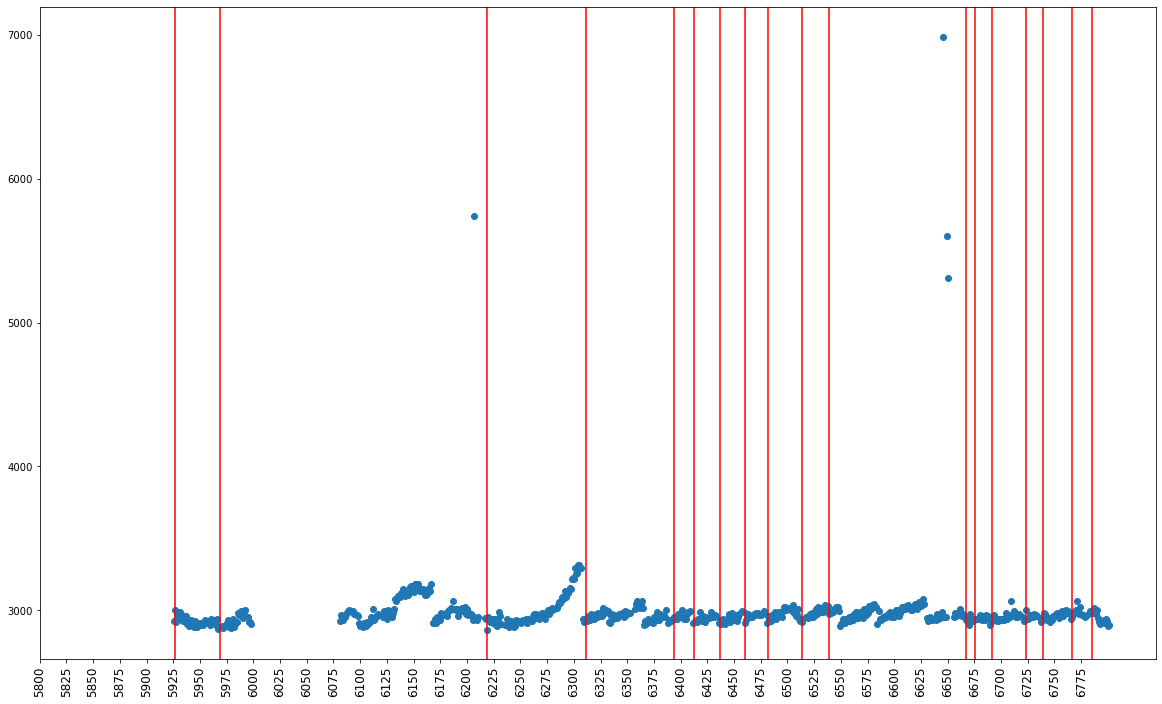

In [72]:
plt.figure(figsize=(20,12))
plt.scatter(Tool5_stat.index, Tool5_stat['mean'])
plt.xticks(np.arange(5800, 6800, step = 25), fontsize = 12, rotation = 90)
for chl_idx in change_shot:
    plt.axvline(chl_idx, color = 'red', label = '{}'.format(chl_idx), linestyle = 'solid')

In [73]:
Tool5_stat

,mean,sum,std,sem,median,var,max
5926,2925.809430,2978474,546.849143,17.139322,2693.0,299043.985280,7225
5927,2999.691843,2978694,583.365458,18.512543,2801.0,340315.257766,7600
5928,2920.630009,3133836,563.067278,17.189389,2715.0,317044.759434,7737
5929,2967.521780,3133703,560.045382,17.234205,2806.5,313650.829857,7755
5930,2955.651727,3165503,565.222425,17.271285,2745.0,319476.389808,6657
...,...,...,...,...,...,...,...
6797,2910.125000,3142935,540.805556,16.456189,2691.0,292470.648865,7803
6798,2943.144590,3155051,551.894698,16.856167,2762.0,304587.757786,7342
6799,2928.033397,3068579,527.085810,16.281735,2752.0,277819.451606,6789
6800,2892.975654,3208310,518.624180,15.573527,2692.0,268971.040020,6672


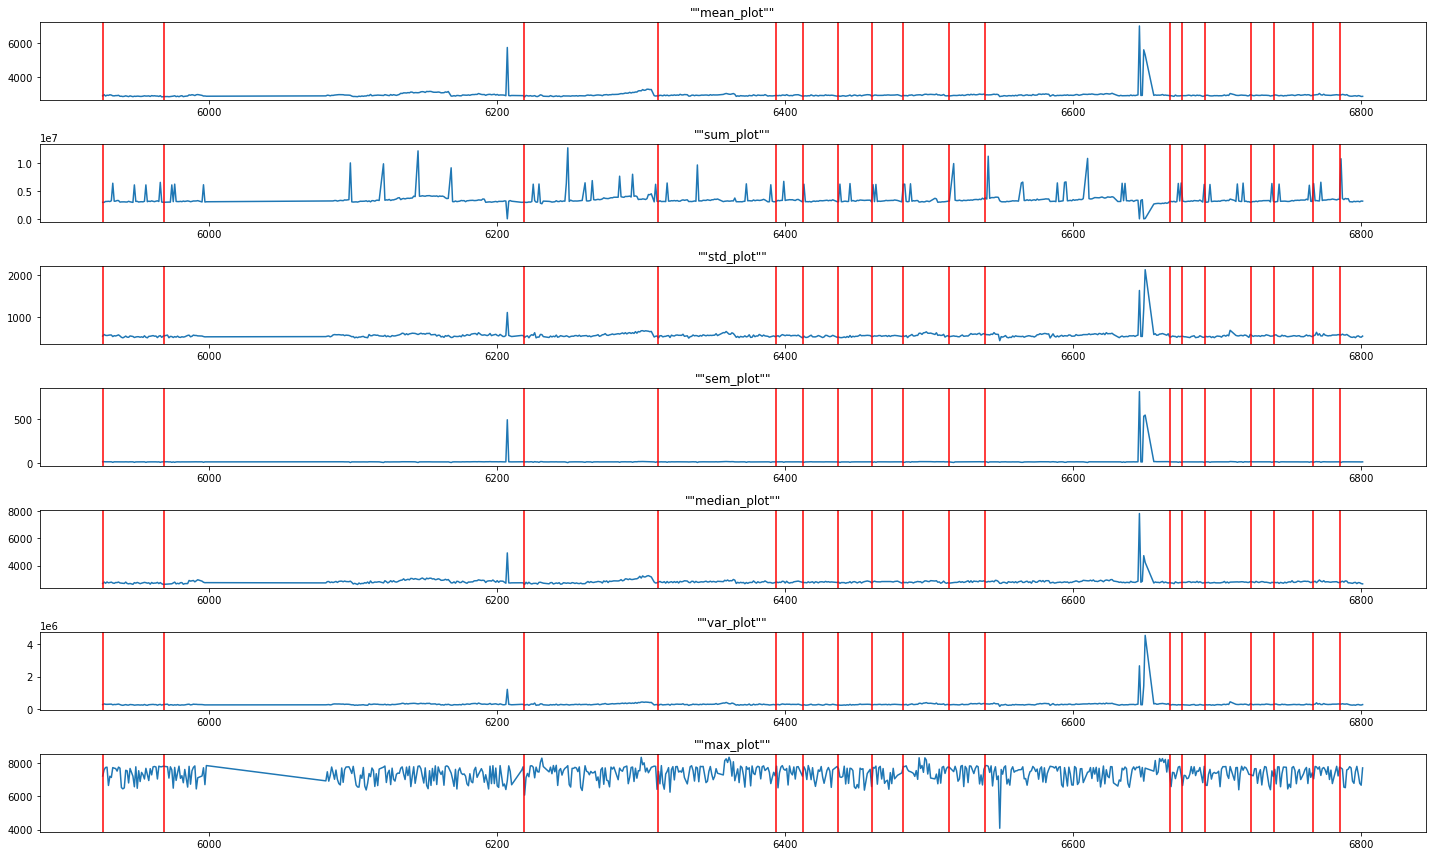

In [74]:
fig = plt.figure(figsize = (20, 12))

for idx in range(len(temp)):
    globals()['ax{}'.format(idx)] = fig.add_subplot(len(temp),1,idx+1)
    globals()['ax{}'.format(idx)].plot(Tool5_stat.iloc[:,idx])
    for chl_idx in change_shot:
        globals()['ax{}'.format(idx)].axvline(chl_idx, color = 'red', label = '{}'.format(chl_idx), linestyle = 'solid')
    globals()['ax{}'.format(idx)].set_title('""{}_plot""'.format(Tool5_stat.iloc[:,idx].name))
plt.tight_layout()

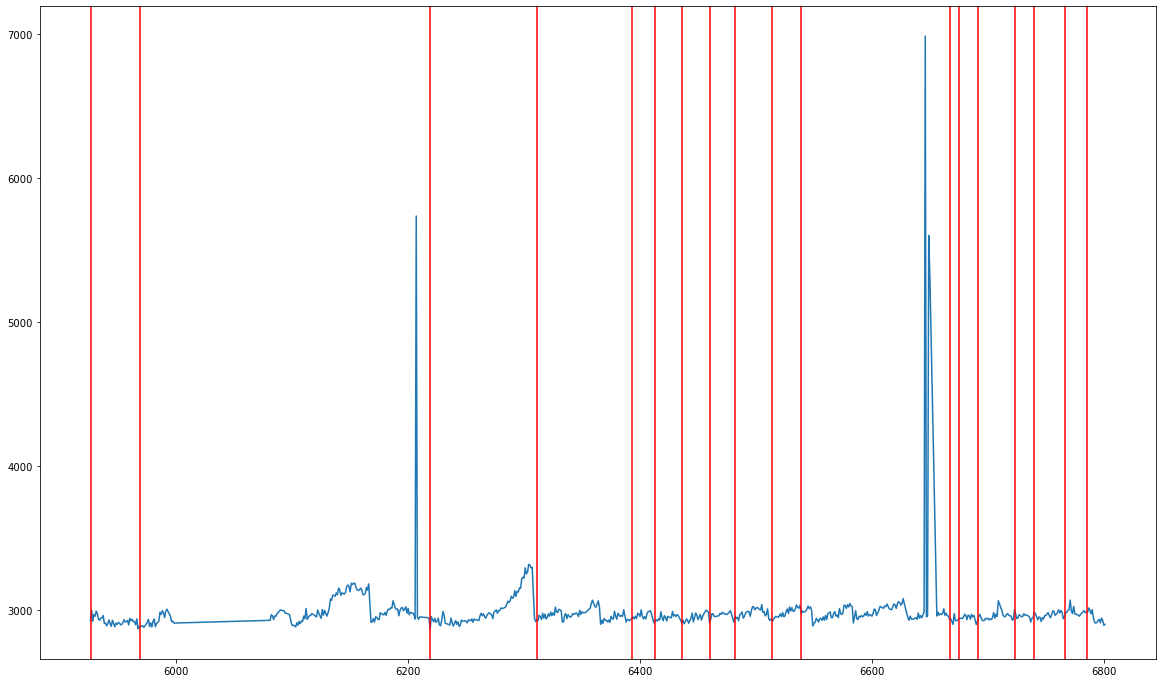

In [75]:
plt.figure(figsize=(20,12))
plt.plot(Tool5_stat['mean'])
for chl_idx in change_shot:
    plt.axvline(chl_idx, color = 'red', label = '{}'.format(chl_idx), linestyle = 'solid')

Text(0.5, 1.0, 'Mean scatter')

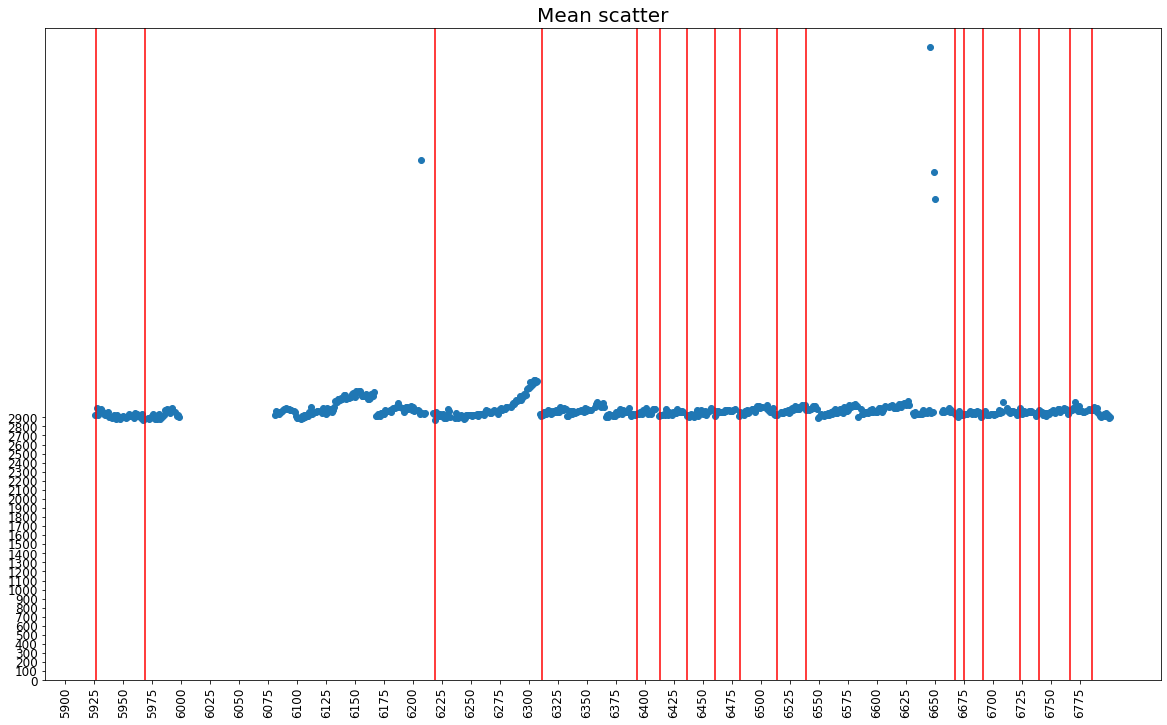

In [76]:
plt.figure(figsize=(20,12))
plt.scatter(Tool5_stat.index, Tool5_stat['mean'])
plt.xticks(np.arange(5900, 6800, step = 25), fontsize = 12, rotation = 90)
plt.yticks(np.arange(0, 3000, step = 100), fontsize = 12)
for chl_idx in change_shot:
    plt.axvline(chl_idx, color = 'red', label = '{}'.format(chl_idx), linestyle = 'solid')
plt.title('Mean scatter', fontsize = 20)

# 교체 후 Tip이 망가질때까지 생산한 Shot은 6219 ~ 6311
이 데이터를 기반으로 같은 분포의 데이터 생성

In [78]:
Tool5_small = Tool5_mod2[(Tool5_mod2['shot_no'] >= 6219) & (Tool5_mod2['shot_no'] <= 6311)]
Tool5_small

,tool_number,shot_no,current_x,current_z,current_spindle,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tip_number,state,date,hour,minute,second
datetime,,,,,,,,,,,,,,,,,,
2022-08-03 09:53:54,505,6219,1,157,2424,299,60.0,6.0,3.0,57.0,3.0,-57.0,5,operation,2022-08-03,9,53,54
2022-08-03 09:53:54,505,6219,1,157,2424,299,60.0,6.0,3.0,57.0,3.0,-57.0,5,operation,2022-08-03,9,53,54
2022-08-03 09:53:54,505,6219,1,157,2424,300,60.0,5.0,4.0,56.0,4.0,-56.0,5,operation,2022-08-03,9,53,54
2022-08-03 09:53:54,505,6219,1,161,2447,300,60.0,6.0,4.0,58.0,4.0,-58.0,5,operation,2022-08-03,9,53,54
2022-08-03 09:53:55,505,6219,1,161,2447,299,60.0,5.0,4.0,57.0,4.0,-57.0,5,operation,2022-08-03,9,53,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-12 10:37:06,505,6311,22,10,6206,276,0.0,113.0,5.0,71.0,5.0,-71.0,5,operation,2022-08-12,10,37,6
2022-08-12 10:37:06,505,6311,22,10,6206,207,0.0,122.0,5.0,73.0,5.0,-73.0,5,operation,2022-08-12,10,37,6
2022-08-12 10:37:06,505,6311,6,11,6423,119,0.0,122.0,4.0,72.0,4.0,-72.0,5,operation,2022-08-12,10,37,6


In [79]:
max(Tool5_small['current_spindle'])

8347

In [80]:
max(Tool5_mod1[Tool5_mod1['shot_no'] == 6312]['current_spindle'])

7510

In [81]:
# 작업자 입력 교체시간 리스트화(To-Be)
change_list_small = pd.Series(['2022-08-03 09:30:00','2022-08-12 11:10:00'], name = 'datetime')
change_shot_small = pd.Series([6218.5, 6311.5], name = 'shot_no')
state_list_small = []
for state_idx_small in range(0, len(change_list_small)):
    state_list_small.append('change')
state_list_small = pd.Series(state_list_small, name = 'state')
change_data_small = pd.concat([change_shot_small, state_list_small], axis = 1) # change_list
change_data_small = pd.concat([change_list_small, change_data_small], axis = 1)
change_data_small = change_data_small.set_index('datetime')
change_data_small

,shot_no,state
datetime,,
2022-08-03 09:30:00,6218.5,change
2022-08-12 11:10:00,6311.5,change


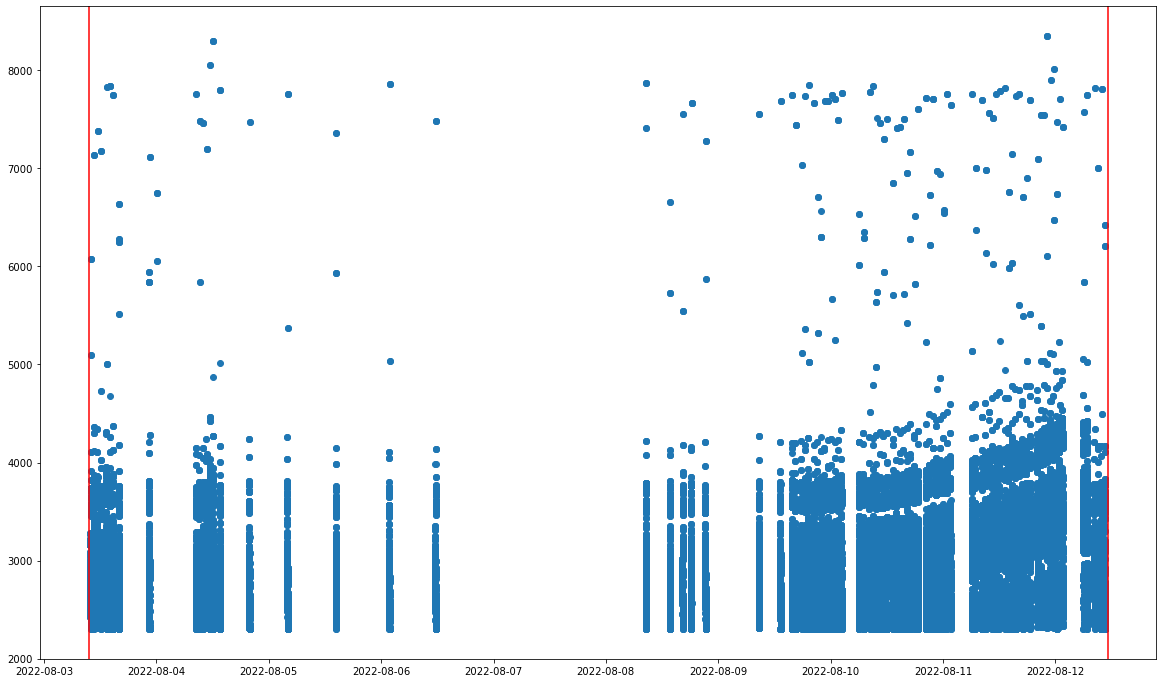

In [82]:
plt.figure(figsize = (20,12))
plt.scatter(Tool5_small.index, Tool5_small['current_spindle'])
for chl_idx_small in change_list_small:
    plt.axvline(chl_idx_small, color = 'red', label = '{}'.format(chl_idx), linestyle = 'solid')

In [83]:
Tool5_small

,tool_number,shot_no,current_x,current_z,current_spindle,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tip_number,state,date,hour,minute,second
datetime,,,,,,,,,,,,,,,,,,
2022-08-03 09:53:54,505,6219,1,157,2424,299,60.0,6.0,3.0,57.0,3.0,-57.0,5,operation,2022-08-03,9,53,54
2022-08-03 09:53:54,505,6219,1,157,2424,299,60.0,6.0,3.0,57.0,3.0,-57.0,5,operation,2022-08-03,9,53,54
2022-08-03 09:53:54,505,6219,1,157,2424,300,60.0,5.0,4.0,56.0,4.0,-56.0,5,operation,2022-08-03,9,53,54
2022-08-03 09:53:54,505,6219,1,161,2447,300,60.0,6.0,4.0,58.0,4.0,-58.0,5,operation,2022-08-03,9,53,54
2022-08-03 09:53:55,505,6219,1,161,2447,299,60.0,5.0,4.0,57.0,4.0,-57.0,5,operation,2022-08-03,9,53,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-12 10:37:06,505,6311,22,10,6206,276,0.0,113.0,5.0,71.0,5.0,-71.0,5,operation,2022-08-12,10,37,6
2022-08-12 10:37:06,505,6311,22,10,6206,207,0.0,122.0,5.0,73.0,5.0,-73.0,5,operation,2022-08-12,10,37,6
2022-08-12 10:37:06,505,6311,6,11,6423,119,0.0,122.0,4.0,72.0,4.0,-72.0,5,operation,2022-08-12,10,37,6


# Small data의 Data augmentation 수행
1. Traditional
 1.1 Slicing(Time slicing window) : 각 데이터 샘플의 부분을 짤라서 구성하고 새로운 다른 샘플을 만드는 방법
  - concatenating과 resampling 방법을 활용하며, 이는 original 데이터의 특성과 다른 샘플이 생성됨
 1.2 Jittering : DA 수행을 위한 time series 노이즈를 추가하는 방법, Time series DA 방법중 가장 간단하고 제일 많이 쓰이는 방법
  - 일반적으로 가우시안 노이즈를 추가하여 새로운 샘플을 생성하여 시뮬레이션할 수 있음
 1.3 Scaling : Time series 도메인의 어떤 단계의 규모를 변화시키는 것, 전체의 형태를 유지하기 위해서 사용되는 방법
  - 새로운 데이터가 생성되어 값의 범위가 변화될 수 있으나, 스케일링을 활용하면 전체적인 형태를 유지
 1.4 Rotation : Rotation은 정의된 앵글의 roatation matrix를 적용함으로써 다변량 time series에 적용될 수 있음
  - 이 방법은 class 정보를 잃어버리기 때문에 time series에 매우 적합하지 않음, 사용하는 경우도 있음
 1.5 Permutation : DA를 수행하기 위해서 다른 time 데이터 샘플을 섞는 작업
  - 순열 적용의 주요 문제는 시간 종속성을 유지하지 않아서 유효하지 않은 샘플로 이어질 수 있음
 1.6 Channel permutation : 다차원 데이터에서 다른 채널의 위치를 변경하는 것은 일반적임
  - 시계열 영역에서 이 알고리즘은 데이터 적용에 적용할 수 없음
  - 순열은 채널 정보가 채널 자체와 무관하다고 가정하기 때문임
2. Deep learning : AE(AutoEncoder), VAE, GANs(discrete-variant GANs, continuoust-variant GANs) DA(Data augmentation)등을 활용하여 수행
 2.1 AutoEncoder : 시계열 데이터 증강을 위해서 사용될 수 있음
 2.2 VAE : VAE는 LSTM의 이상탐지 문제에 대한 데이터 생성하는데 사용됨
  - DA에 VAE를 사용하는 것은 신경망 모델을 위한 것일 뿐만 아니라 기존 기계 학습 알고리즘을 적용할 때 결과 개선 가능
  - 이상탐지를 위한 VAE 알고리즘 : CVAE for ECG anomaly detection, SVSVAE
 2.3 GANs : GAN 아키텍처의 가장 큰 장점은 분포를 직접 복사하지 않고 샘플의 주요 특징을 추출하여 데이터의 분포를 학습함, label이 존재하지 않아도 됨
  - LSTM based GANs
  - Convolutional GANs
  - 1D convolution GANs
  - Time series Generative Adversarial Networks(TimeGAN)

<AxesSubplot:>

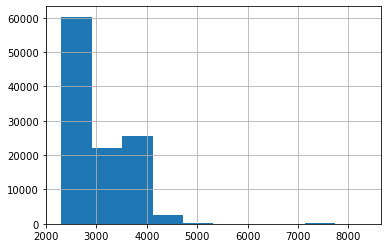

In [84]:
Tool5_small['current_spindle'].hist()

In [85]:
Tool5_small

,tool_number,shot_no,current_x,current_z,current_spindle,rpm,feed,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z,tip_number,state,date,hour,minute,second
datetime,,,,,,,,,,,,,,,,,,
2022-08-03 09:53:54,505,6219,1,157,2424,299,60.0,6.0,3.0,57.0,3.0,-57.0,5,operation,2022-08-03,9,53,54
2022-08-03 09:53:54,505,6219,1,157,2424,299,60.0,6.0,3.0,57.0,3.0,-57.0,5,operation,2022-08-03,9,53,54
2022-08-03 09:53:54,505,6219,1,157,2424,300,60.0,5.0,4.0,56.0,4.0,-56.0,5,operation,2022-08-03,9,53,54
2022-08-03 09:53:54,505,6219,1,161,2447,300,60.0,6.0,4.0,58.0,4.0,-58.0,5,operation,2022-08-03,9,53,54
2022-08-03 09:53:55,505,6219,1,161,2447,299,60.0,5.0,4.0,57.0,4.0,-57.0,5,operation,2022-08-03,9,53,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-12 10:37:06,505,6311,22,10,6206,276,0.0,113.0,5.0,71.0,5.0,-71.0,5,operation,2022-08-12,10,37,6
2022-08-12 10:37:06,505,6311,22,10,6206,207,0.0,122.0,5.0,73.0,5.0,-73.0,5,operation,2022-08-12,10,37,6
2022-08-12 10:37:06,505,6311,6,11,6423,119,0.0,122.0,4.0,72.0,4.0,-72.0,5,operation,2022-08-12,10,37,6


In [86]:
Tool5_small.reset_index(inplace = True)

In [87]:
Tool5_small_spindle = Tool5_small[['datetime', 'shot_no', 'current_spindle']]
Tool5_small_x = Tool5_small[['datetime', 'shot_no', 'current_x']]
Tool5_small_z = Tool5_small[['datetime', 'shot_no', 'current_z']]
Tool5_small_rpm = Tool5_small[['datetime', 'shot_no', 'rpm']]
Tool5_small_load = Tool5_small[['datetime', 'shot_no', 'load_1']]
Tool5_small_slx = Tool5_small[['datetime', 'shot_no', 'servo_load_x']]
Tool5_small_slz = Tool5_small[['datetime', 'shot_no', 'servo_load_z']]
Tool5_small_scx = Tool5_small[['datetime', 'shot_no', 'servo_current_x']]
Tool5_small_scz = Tool5_small[['datetime', 'shot_no', 'servo_current_z']]

# current_spindle augmentation

In [88]:
Tool5_small_spindle

,datetime,shot_no,current_spindle
0,2022-08-03 09:53:54,6219,2424
1,2022-08-03 09:53:54,6219,2424
2,2022-08-03 09:53:54,6219,2424
3,2022-08-03 09:53:54,6219,2447
4,2022-08-03 09:53:55,6219,2447
...,...,...,...
110767,2022-08-12 10:37:06,6311,6206
110768,2022-08-12 10:37:06,6311,6206
110769,2022-08-12 10:37:06,6311,6423
110770,2022-08-12 10:37:06,6311,6423


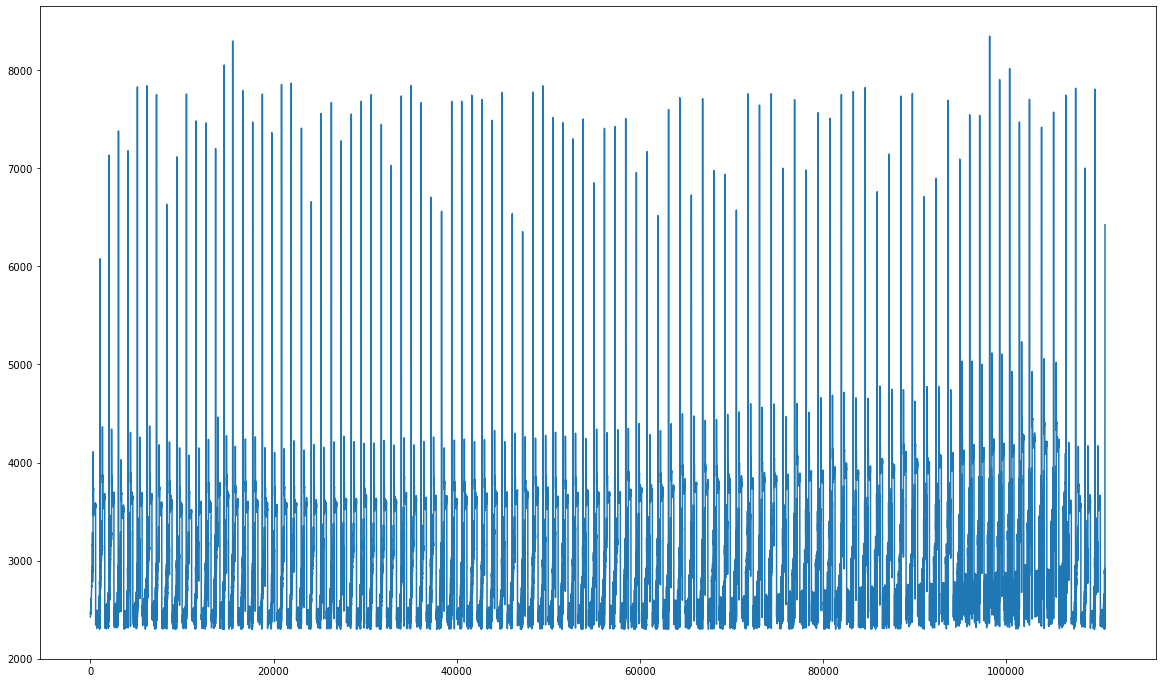

In [89]:
X = np.arange(len(Tool5_small))
Y = Tool5_small['current_spindle'].tolist()
CX = np.array(Tool5_small['current_x'].tolist())
CZ = np.array(Tool5_small['current_z'].tolist())
RPM = np.array(Tool5_small['rpm'].tolist())
LOAD = np.array(Tool5_small['load_1'].tolist())
S_LOAD_X = np.array(Tool5_small['servo_load_x'].tolist())
S_LOAD_Z = np.array(Tool5_small['servo_load_z'].tolist())
S_CURRENT_X = np.array(Tool5_small['servo_current_x'].tolist())
S_CURRENT_Z = np.array(Tool5_small['servo_current_z'].tolist())
plt.figure(figsize = (20,12))
plt.plot(X, Y)

# Jitter(AddNoise)

In [90]:
len(Tool5_small_spindle)

110772

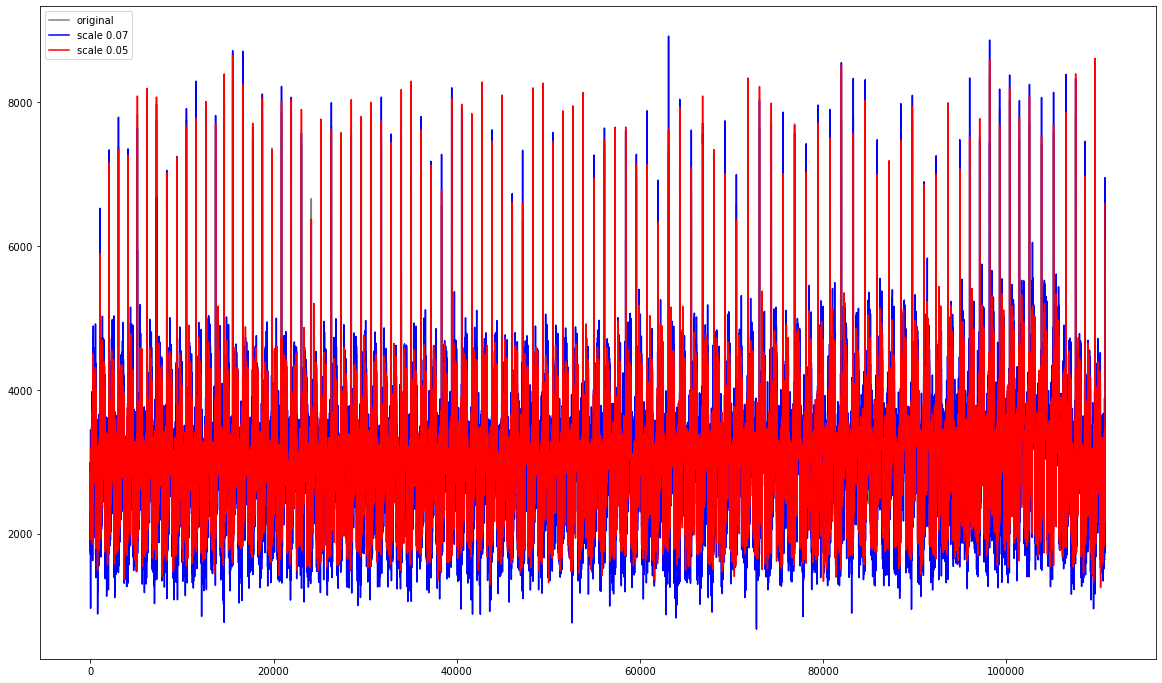

In [91]:
Y = np.array(Y)
datetime = np.array(Tool5_small['datetime'].tolist())
shot_no = np.array(Tool5_small['shot_no'].tolist())

Y_aug, X_aug = tsaug.AddNoise(scale = 0.07).augment(Y, X)
Y_aug_CX, X_aug_CX = tsaug.AddNoise(scale = 0.07).augment(CX, X)
Y_aug_CZ, X_aug_CZ = tsaug.AddNoise(scale = 0.07).augment(CZ, X)
Y_aug_RPM, X_aug_RPM = tsaug.AddNoise(scale = 0.07).augment(RPM, X)
Y_aug_LOAD, X_aug_LOAD = tsaug.AddNoise(scale = 0.07).augment(LOAD, X)
Y_aug_SLX, X_aug_SLX = tsaug.AddNoise(scale = 0.07).augment(S_LOAD_X, X)
Y_aug_SLZ, X_aug_SLZ = tsaug.AddNoise(scale = 0.07).augment(S_LOAD_Z, X)
Y_aug_SCX, X_aug_SCX = tsaug.AddNoise(scale = 0.07).augment(S_CURRENT_X, X)
Y_aug_SCZ, X_aug_SCZ = tsaug.AddNoise(scale = 0.07).augment(S_CURRENT_Z, X)

Y_aug2, X_aug2 = tsaug.AddNoise(scale = 0.05).augment(Y, X)
Y_aug2_CX, X_aug2_CX = tsaug.AddNoise(scale = 0.05).augment(CX, X)
Y_aug2_CZ, X_aug2_CZ = tsaug.AddNoise(scale = 0.05).augment(CZ, X)
Y_aug2_RPM, X_aug2_RPM = tsaug.AddNoise(scale = 0.05).augment(RPM, X)
Y_aug2_LOAD, X_aug2_LOAD = tsaug.AddNoise(scale = 0.05).augment(LOAD, X)
Y_aug2_SLX, X_aug2_SLX = tsaug.AddNoise(scale = 0.05).augment(S_LOAD_X, X)
Y_aug2_SLZ, X_aug2_SLZ = tsaug.AddNoise(scale = 0.05).augment(S_LOAD_Z, X)
Y_aug2_SCX, X_aug2_SCX = tsaug.AddNoise(scale = 0.05).augment(S_CURRENT_X, X)
Y_aug2_SCZ, X_aug2_SCZ = tsaug.AddNoise(scale = 0.05).augment(S_CURRENT_Z, X)

plt.figure(figsize = (20, 12))
plt.plot(Y, label = 'original', color = 'gray')
plt.plot(Y_aug, label = 'scale 0.07', color = 'blue')
plt.plot(Y_aug2, label = 'scale 0.05', color = 'red')
plt.legend()

In [92]:
Tool5_small_spindle

,datetime,shot_no,current_spindle
0,2022-08-03 09:53:54,6219,2424
1,2022-08-03 09:53:54,6219,2424
2,2022-08-03 09:53:54,6219,2424
3,2022-08-03 09:53:54,6219,2447
4,2022-08-03 09:53:55,6219,2447
...,...,...,...
110767,2022-08-12 10:37:06,6311,6206
110768,2022-08-12 10:37:06,6311,6206
110769,2022-08-12 10:37:06,6311,6423
110770,2022-08-12 10:37:06,6311,6423


In [93]:
original = Tool5_small_spindle.copy()
current_aug1 = Tool5_small_spindle.copy()
current_aug1_CX = Tool5_small_x.copy()
current_aug1_CZ = Tool5_small_z.copy()
current_aug1_RPM = Tool5_small_rpm.copy()
current_aug1_LOAD = Tool5_small_load.copy()
current_aug1_SLX = Tool5_small_slx.copy()
current_aug1_SLZ = Tool5_small_slz.copy()
current_aug1_SCX = Tool5_small_scx.copy()
current_aug1_SCZ = Tool5_small_scz.copy()

current_aug2 = Tool5_small_spindle.copy()
current_aug2_CX = Tool5_small_x.copy()
current_aug2_CZ = Tool5_small_z.copy()
current_aug2_RPM = Tool5_small_rpm.copy()
current_aug2_LOAD = Tool5_small_load.copy()
current_aug2_SLX = Tool5_small_slx.copy()
current_aug2_SLZ = Tool5_small_slz.copy()
current_aug2_SCX = Tool5_small_scx.copy()
current_aug2_SCZ = Tool5_small_scz.copy()

Tool5_small_spindle = Tool5_small[['datetime', 'shot_no', 'current_spindle']]
Tool5_small_x = Tool5_small[['datetime', 'shot_no', 'current_x']]
Tool5_small_z = Tool5_small[['datetime', 'shot_no', 'current_z']]
Tool5_small_rpm = Tool5_small[['datetime', 'shot_no', 'rpm']]
Tool5_small_load = Tool5_small[['datetime', 'shot_no', 'load_1']]
Tool5_small_slx = Tool5_small[['datetime', 'shot_no', 'servo_load_x']]
Tool5_small_slz = Tool5_small[['datetime', 'shot_no', 'servo_load_z']]
Tool5_small_scx = Tool5_small[['datetime', 'shot_no', 'servo_current_x']]
Tool5_small_scz = Tool5_small[['datetime', 'shot_no', 'servo_current_z']]

In [94]:
original

,datetime,shot_no,current_spindle
0,2022-08-03 09:53:54,6219,2424
1,2022-08-03 09:53:54,6219,2424
2,2022-08-03 09:53:54,6219,2424
3,2022-08-03 09:53:54,6219,2447
4,2022-08-03 09:53:55,6219,2447
...,...,...,...
110767,2022-08-12 10:37:06,6311,6206
110768,2022-08-12 10:37:06,6311,6206
110769,2022-08-12 10:37:06,6311,6423
110770,2022-08-12 10:37:06,6311,6423


In [95]:
Y_aug, X_aug = tsaug.AddNoise(scale = 0.1).augment(Y, X)
Y_aug_CX, X_aug_CX = tsaug.AddNoise(scale = 0.1).augment(CX, X)
Y_aug_CZ, X_aug_CZ = tsaug.AddNoise(scale = 0.1).augment(CZ, X)
Y_aug_RPM, X_aug_RPM = tsaug.AddNoise(scale = 0.1).augment(RPM, X)
Y_aug_SLX, X_aug_SLX = tsaug.AddNoise(scale = 0.1).augment(S_LOAD_X, X)
Y_aug_SLZ, X_aug_SLZ = tsaug.AddNoise(scale = 0.1).augment(S_LOAD_Z, X)
Y_aug_SCX, X_aug_SCX = tsaug.AddNoise(scale = 0.1).augment(S_CURRENT_X, X)
Y_aug_SCZ, X_aug_SCZ = tsaug.AddNoise(scale = 0.1).augment(S_CURRENT_Z, X)

Y_aug2, X_aug2 = tsaug.AddNoise(scale = 0.05).augment(Y, X)
Y_aug2_CX, X_aug2_CX = tsaug.AddNoise(scale = 0.05).augment(CX, X)
Y_aug2_CZ, X_aug2_CZ = tsaug.AddNoise(scale = 0.05).augment(CZ, X)
Y_aug2_RPM, X_aug2_RPM = tsaug.AddNoise(scale = 0.05).augment(RPM, X)
Y_aug2_SLX, X_aug2_SLX = tsaug.AddNoise(scale = 0.05).augment(S_LOAD_X, X)
Y_aug2_SLZ, X_aug2_SLZ = tsaug.AddNoise(scale = 0.05).augment(S_LOAD_Z, X)
Y_aug2_SCX, X_aug2_SCX = tsaug.AddNoise(scale = 0.05).augment(S_CURRENT_X, X)
Y_aug2_SCZ, X_aug2_SCZ = tsaug.AddNoise(scale = 0.05).augment(S_CURRENT_Z, X)

In [96]:
#  증강 데이터 aug1, aug2의 current_spindle 값 변경
current_spindle_shot = original['shot_no'].unique()
current_spindle_new_shot = np.arange(1, len(current_spindle_shot)+1)
original['current_x'] = Tool5_small.copy()['current_x']
original['current_z'] = Tool5_small.copy()['current_z']
original['rpm'] = Tool5_small.copy()['rpm']
original['load_1'] = Tool5_small.copy()['load_1']
original['servo_load_x'] = Tool5_small.copy()['servo_load_x']
original['servo_load_z'] = Tool5_small.copy()['servo_load_z']
original['servo_current_x'] = Tool5_small.copy()['servo_current_x']
original['servo_current_z'] = Tool5_small.copy()['servo_current_z']
for idx in range(0, len(current_spindle_shot)):
    original['shot_no'] = original['shot_no'].replace(current_spindle_shot[idx], current_spindle_new_shot[idx])

In [97]:
current_aug1_shot = current_aug1['shot_no'].unique()
current_aug1_new_shot = np.arange(len(current_aug1_shot)+1, len(current_spindle_new_shot)+1+len(current_spindle_new_shot))
current_aug1['current_spindle'] = Y_aug
current_aug1['current_x'] = Y_aug_CX
current_aug1['current_z'] = Y_aug_CZ
current_aug1['rpm'] = Y_aug_RPM
current_aug1['load_1'] = Y_aug_LOAD
current_aug1['servo_load_x'] = Y_aug_SLX
current_aug1['servo_load_z'] = Y_aug_SLZ
current_aug1['servo_current_x'] = Y_aug_SCX
current_aug1['servo_current_z'] = Y_aug_SCZ
for idx2 in range(0, len(current_aug1_shot)):
    current_aug1['shot_no'] = current_aug1['shot_no'].replace(current_aug1_shot[idx2], current_aug1_new_shot[idx2])    

In [98]:
current_aug1

,datetime,shot_no,current_spindle,current_x,current_z,rpm,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z
0,2022-08-03 09:53:54,87,1799,45,445,295,6.740601,8.885691,30.422238,8.523815,-60.217226
1,2022-08-03 09:53:54,87,2909,-75,72,260,10.870226,1.591138,67.327855,6.339835,-24.616380
2,2022-08-03 09:53:54,87,1933,-49,146,279,3.046677,9.051651,50.214293,4.030300,-70.773800
3,2022-08-03 09:53:54,87,1847,-47,403,337,5.176737,12.784142,89.870848,6.472629,-53.713414
4,2022-08-03 09:53:55,87,3205,80,104,313,0.520645,2.363785,54.914641,2.436337,-73.509897
...,...,...,...,...,...,...,...,...,...,...,...
110767,2022-08-12 10:37:06,172,6982,111,64,256,110.500777,3.510579,52.727242,29.134259,-88.599405
110768,2022-08-12 10:37:06,172,6068,34,96,187,143.799246,3.145890,77.799016,30.426937,-72.595576
110769,2022-08-12 10:37:06,172,6858,50,0,110,130.752831,7.538078,28.503181,-28.746190,-65.653969
110770,2022-08-12 10:37:06,172,6040,92,-45,173,121.798245,18.829486,84.763451,-17.815957,-64.613030


In [99]:
current_aug2_shot = current_aug2['shot_no'].unique()
current_aug2_new_shot = np.arange(current_aug1_new_shot[-1]+1, current_aug1_new_shot[-1]+1 + len(current_aug2_shot))
current_aug2['current_spindle'] = Y_aug2
current_aug2['current_x'] = Y_aug2_CX
current_aug2['current_z'] = Y_aug2_CZ
current_aug2['rpm'] = Y_aug2_RPM
current_aug2['load_1'] = Y_aug_LOAD
current_aug2['servo_load_x'] = Y_aug_SLX
current_aug2['servo_load_z'] = Y_aug_SLZ
current_aug2['servo_current_x'] = Y_aug_SCX
current_aug2['servo_current_z'] = Y_aug_SCZ
for idx3 in range(0, len(current_aug2_shot)):   
    current_aug2['shot_no'] = current_aug2['shot_no'].replace(current_aug2_shot[idx3], current_aug2_new_shot[idx3])

In [100]:
current_aug2

,datetime,shot_no,current_spindle,current_x,current_z,rpm,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z
0,2022-08-03 09:53:54,173,2367,-3,166,341,6.740601,8.885691,30.422238,8.523815,-60.217226
1,2022-08-03 09:53:54,173,2042,13,0,286,10.870226,1.591138,67.327855,6.339835,-24.616380
2,2022-08-03 09:53:54,173,2705,35,118,333,3.046677,9.051651,50.214293,4.030300,-70.773800
3,2022-08-03 09:53:54,173,2698,-22,306,286,5.176737,12.784142,89.870848,6.472629,-53.713414
4,2022-08-03 09:53:55,173,2523,-12,179,270,0.520645,2.363785,54.914641,2.436337,-73.509897
...,...,...,...,...,...,...,...,...,...,...,...
110767,2022-08-12 10:37:06,258,6022,24,49,261,110.500777,3.510579,52.727242,29.134259,-88.599405
110768,2022-08-12 10:37:06,258,6014,4,-58,224,143.799246,3.145890,77.799016,30.426937,-72.595576
110769,2022-08-12 10:37:06,258,6598,80,70,147,130.752831,7.538078,28.503181,-28.746190,-65.653969
110770,2022-08-12 10:37:06,258,6215,32,-103,138,121.798245,18.829486,84.763451,-17.815957,-64.613030


# Quantize

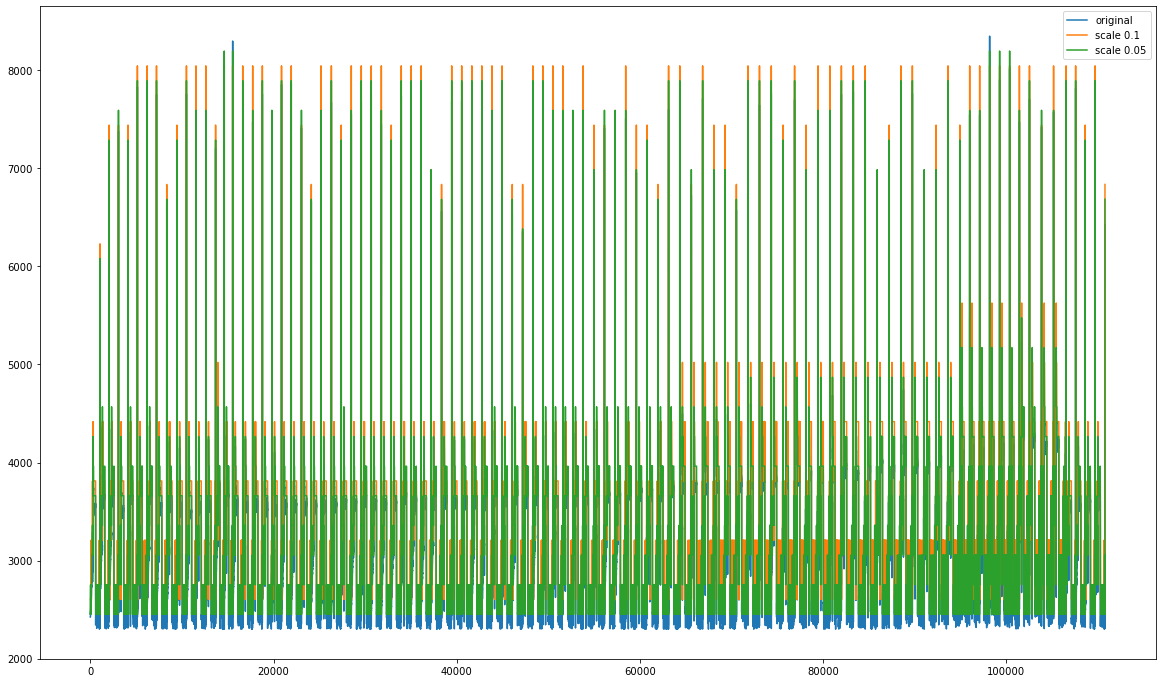

In [101]:
Y_Quan_aug, X_Quan_aug = tsaug.Quantize(n_levels = 10).augment(Y, X)
Y_Quan_aug2, X_Quan_aug2 = tsaug.Quantize(n_levels = 20).augment(Y, X)
plt.figure(figsize = (20, 12))
plt.plot(Y, label = 'original')
plt.plot(Y_Quan_aug, label = 'scale 0.1')
plt.plot(Y_Quan_aug2, label = 'scale 0.05')
plt.legend()

# 증강 데이터의 datetime 규칙성 도출(9/21)

In [102]:
original['datetime'][0]

Timestamp('2022-08-03 09:53:54')

In [103]:
min(original['datetime'])

Timestamp('2022-08-03 09:53:54')

In [104]:
max(original['datetime'])- min(original['datetime'])

Timedelta('9 days 00:43:12')

In [105]:
current_aug1

,datetime,shot_no,current_spindle,current_x,current_z,rpm,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z
0,2022-08-03 09:53:54,87,1799,45,445,295,6.740601,8.885691,30.422238,8.523815,-60.217226
1,2022-08-03 09:53:54,87,2909,-75,72,260,10.870226,1.591138,67.327855,6.339835,-24.616380
2,2022-08-03 09:53:54,87,1933,-49,146,279,3.046677,9.051651,50.214293,4.030300,-70.773800
3,2022-08-03 09:53:54,87,1847,-47,403,337,5.176737,12.784142,89.870848,6.472629,-53.713414
4,2022-08-03 09:53:55,87,3205,80,104,313,0.520645,2.363785,54.914641,2.436337,-73.509897
...,...,...,...,...,...,...,...,...,...,...,...
110767,2022-08-12 10:37:06,172,6982,111,64,256,110.500777,3.510579,52.727242,29.134259,-88.599405
110768,2022-08-12 10:37:06,172,6068,34,96,187,143.799246,3.145890,77.799016,30.426937,-72.595576
110769,2022-08-12 10:37:06,172,6858,50,0,110,130.752831,7.538078,28.503181,-28.746190,-65.653969
110770,2022-08-12 10:37:06,172,6040,92,-45,173,121.798245,18.829486,84.763451,-17.815957,-64.613030


In [106]:
len(current_aug1['datetime'].unique())

23314

# 스몰데이터의 날짜 재조정

In [107]:
from datetime import datetime, timedelta

original_date = pd.date_range(start = '2022-08-03 09:52:44', freq = 's', periods = 49328)
current_aug1_date = pd.date_range(start = original_date[-1] + timedelta(seconds = 1), freq = 's', periods = 49328)
current_aug2_date = pd.date_range(start = current_aug1_date[-1] + timedelta(seconds = 1), freq = 's', periods = 49328)

In [108]:
original_date.unique()

DatetimeIndex(['2022-08-03 09:52:44', '2022-08-03 09:52:45',
               '2022-08-03 09:52:46', '2022-08-03 09:52:47',
               '2022-08-03 09:52:48', '2022-08-03 09:52:49',
               '2022-08-03 09:52:50', '2022-08-03 09:52:51',
               '2022-08-03 09:52:52', '2022-08-03 09:52:53',
               ...
               '2022-08-03 23:34:42', '2022-08-03 23:34:43',
               '2022-08-03 23:34:44', '2022-08-03 23:34:45',
               '2022-08-03 23:34:46', '2022-08-03 23:34:47',
               '2022-08-03 23:34:48', '2022-08-03 23:34:49',
               '2022-08-03 23:34:50', '2022-08-03 23:34:51'],
              dtype='datetime64[ns]', length=49328, freq='S')

In [109]:
current_aug1_date.unique()

DatetimeIndex(['2022-08-03 23:34:52', '2022-08-03 23:34:53',
               '2022-08-03 23:34:54', '2022-08-03 23:34:55',
               '2022-08-03 23:34:56', '2022-08-03 23:34:57',
               '2022-08-03 23:34:58', '2022-08-03 23:34:59',
               '2022-08-03 23:35:00', '2022-08-03 23:35:01',
               ...
               '2022-08-04 13:16:50', '2022-08-04 13:16:51',
               '2022-08-04 13:16:52', '2022-08-04 13:16:53',
               '2022-08-04 13:16:54', '2022-08-04 13:16:55',
               '2022-08-04 13:16:56', '2022-08-04 13:16:57',
               '2022-08-04 13:16:58', '2022-08-04 13:16:59'],
              dtype='datetime64[ns]', length=49328, freq='S')

In [110]:
current_aug2_date.unique()

DatetimeIndex(['2022-08-04 13:17:00', '2022-08-04 13:17:01',
               '2022-08-04 13:17:02', '2022-08-04 13:17:03',
               '2022-08-04 13:17:04', '2022-08-04 13:17:05',
               '2022-08-04 13:17:06', '2022-08-04 13:17:07',
               '2022-08-04 13:17:08', '2022-08-04 13:17:09',
               ...
               '2022-08-05 02:58:58', '2022-08-05 02:58:59',
               '2022-08-05 02:59:00', '2022-08-05 02:59:01',
               '2022-08-05 02:59:02', '2022-08-05 02:59:03',
               '2022-08-05 02:59:04', '2022-08-05 02:59:05',
               '2022-08-05 02:59:06', '2022-08-05 02:59:07'],
              dtype='datetime64[ns]', length=49328, freq='S')

In [111]:
original['datetime'].replace(original['datetime'].unique()[0], original_date.unique()[0])

0        2022-08-03 09:52:44
1        2022-08-03 09:52:44
2        2022-08-03 09:52:44
3        2022-08-03 09:52:44
4        2022-08-03 09:53:55
                 ...        
110767   2022-08-12 10:37:06
110768   2022-08-12 10:37:06
110769   2022-08-12 10:37:06
110770   2022-08-12 10:37:06
110771   2022-08-12 10:37:06
Name: datetime, Length: 110772, dtype: datetime64[ns]

In [112]:
# 변경된 날짜(datetime)로 값 변경
original_ASIS_datetime = original['datetime'].unique()
current_ASIS_aug1_datetime = current_aug1['datetime'].unique()
current_ASIS_aug2_datetime = current_aug2['datetime'].unique()

for date_idx in range(0, len(original_ASIS_datetime)):
    original['datetime'] = original['datetime'].replace(original_ASIS_datetime[date_idx], original_date[date_idx])
    current_aug1['datetime'] = current_aug1['datetime'].replace(current_ASIS_aug1_datetime[date_idx], current_aug1_date[date_idx])
    current_aug2['datetime'] = current_aug2['datetime'].replace(current_ASIS_aug2_datetime[date_idx], current_aug2_date[date_idx])

In [113]:
original

,datetime,shot_no,current_spindle,current_x,current_z,rpm,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z
0,2022-08-03 09:52:44,1,2424,1,157,299,6.0,3.0,57.0,3.0,-57.0
1,2022-08-03 09:52:44,1,2424,1,157,299,6.0,3.0,57.0,3.0,-57.0
2,2022-08-03 09:52:44,1,2424,1,157,300,5.0,4.0,56.0,4.0,-56.0
3,2022-08-03 09:52:44,1,2447,1,161,300,6.0,4.0,58.0,4.0,-58.0
4,2022-08-03 09:52:45,1,2447,1,161,299,5.0,4.0,57.0,4.0,-57.0
...,...,...,...,...,...,...,...,...,...,...,...
110767,2022-08-03 16:21:17,86,6206,22,10,276,113.0,5.0,71.0,5.0,-71.0
110768,2022-08-03 16:21:17,86,6206,22,10,207,122.0,5.0,73.0,5.0,-73.0
110769,2022-08-03 16:21:17,86,6423,6,11,119,122.0,4.0,72.0,4.0,-72.0
110770,2022-08-03 16:21:17,86,6423,6,11,119,122.0,4.0,72.0,4.0,-72.0


In [114]:
current_aug1

,datetime,shot_no,current_spindle,current_x,current_z,rpm,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z
0,2022-08-03 23:34:52,87,1799,45,445,295,6.740601,8.885691,30.422238,8.523815,-60.217226
1,2022-08-03 23:34:52,87,2909,-75,72,260,10.870226,1.591138,67.327855,6.339835,-24.616380
2,2022-08-03 23:34:52,87,1933,-49,146,279,3.046677,9.051651,50.214293,4.030300,-70.773800
3,2022-08-03 23:34:52,87,1847,-47,403,337,5.176737,12.784142,89.870848,6.472629,-53.713414
4,2022-08-03 23:34:53,87,3205,80,104,313,0.520645,2.363785,54.914641,2.436337,-73.509897
...,...,...,...,...,...,...,...,...,...,...,...
110767,2022-08-04 06:03:25,172,6982,111,64,256,110.500777,3.510579,52.727242,29.134259,-88.599405
110768,2022-08-04 06:03:25,172,6068,34,96,187,143.799246,3.145890,77.799016,30.426937,-72.595576
110769,2022-08-04 06:03:25,172,6858,50,0,110,130.752831,7.538078,28.503181,-28.746190,-65.653969
110770,2022-08-04 06:03:25,172,6040,92,-45,173,121.798245,18.829486,84.763451,-17.815957,-64.613030


In [115]:
current_aug2

,datetime,shot_no,current_spindle,current_x,current_z,rpm,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z
0,2022-08-04 13:17:00,173,2367,-3,166,341,6.740601,8.885691,30.422238,8.523815,-60.217226
1,2022-08-04 13:17:00,173,2042,13,0,286,10.870226,1.591138,67.327855,6.339835,-24.616380
2,2022-08-04 13:17:00,173,2705,35,118,333,3.046677,9.051651,50.214293,4.030300,-70.773800
3,2022-08-04 13:17:00,173,2698,-22,306,286,5.176737,12.784142,89.870848,6.472629,-53.713414
4,2022-08-04 13:17:01,173,2523,-12,179,270,0.520645,2.363785,54.914641,2.436337,-73.509897
...,...,...,...,...,...,...,...,...,...,...,...
110767,2022-08-04 19:45:33,258,6022,24,49,261,110.500777,3.510579,52.727242,29.134259,-88.599405
110768,2022-08-04 19:45:33,258,6014,4,-58,224,143.799246,3.145890,77.799016,30.426937,-72.595576
110769,2022-08-04 19:45:33,258,6598,80,70,147,130.752831,7.538078,28.503181,-28.746190,-65.653969
110770,2022-08-04 19:45:33,258,6215,32,-103,138,121.798245,18.829486,84.763451,-17.815957,-64.613030


In [116]:
concat_temp = pd.concat([original, current_aug1], axis = 0)
small_data = pd.concat([concat_temp, current_aug2], axis = 0)

In [117]:
245879 * 3

737637

In [118]:
small_data

,datetime,shot_no,current_spindle,current_x,current_z,rpm,load_1,servo_load_x,servo_load_z,servo_current_x,servo_current_z
0,2022-08-03 09:52:44,1,2424,1,157,299,6.000000,3.000000,57.000000,3.000000,-57.000000
1,2022-08-03 09:52:44,1,2424,1,157,299,6.000000,3.000000,57.000000,3.000000,-57.000000
2,2022-08-03 09:52:44,1,2424,1,157,300,5.000000,4.000000,56.000000,4.000000,-56.000000
3,2022-08-03 09:52:44,1,2447,1,161,300,6.000000,4.000000,58.000000,4.000000,-58.000000
4,2022-08-03 09:52:45,1,2447,1,161,299,5.000000,4.000000,57.000000,4.000000,-57.000000
...,...,...,...,...,...,...,...,...,...,...,...
110767,2022-08-04 19:45:33,258,6022,24,49,261,110.500777,3.510579,52.727242,29.134259,-88.599405
110768,2022-08-04 19:45:33,258,6014,4,-58,224,143.799246,3.145890,77.799016,30.426937,-72.595576
110769,2022-08-04 19:45:33,258,6598,80,70,147,130.752831,7.538078,28.503181,-28.746190,-65.653969
110770,2022-08-04 19:45:33,258,6215,32,-103,138,121.798245,18.829486,84.763451,-17.815957,-64.613030


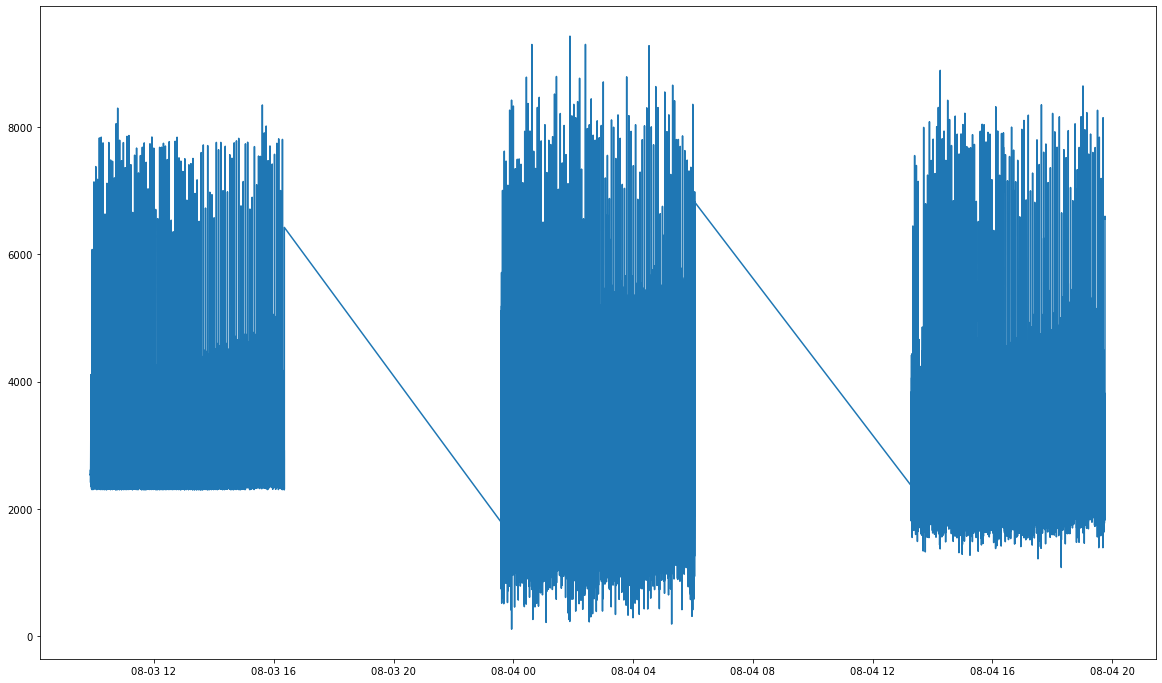

In [119]:
small_data_mod1 = small_data.set_index('datetime')
plt.figure(figsize =(20,12))
plt.plot(small_data_mod1['current_spindle'])

In [120]:
small_data.to_csv('Tool5_small_data_create.csv')

In [121]:
len(current_aug1)

110772

In [122]:
len(Y_aug)

110772